# Loading important libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import tensorflow as tf
from tensorflow import keras
from keras import layers
import time
import IPython
import IPython.display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
%matplotlib inline

# Data Exploration

In [3]:
#Read the dataset
df = pd.read_csv('QuangNgaiStation.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
# df = df.set_index('datetime')
df.shape

(16441, 6)

In [4]:
df.head()

,datetime,rain_fall,temperature,humidity,wind_speed,wind_direction
0,2016-01-15 00:00:00,0.0,23.0,93,4,0
1,2016-01-15 01:00:00,0.0,20.7,94,4,4
2,2016-01-15 02:00:00,10.6,19.8,94,4,18
3,2016-01-15 03:00:00,0.0,22.2,93,4,31
4,2016-01-15 04:00:00,NaN,23.2,94,4,44


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        16441 non-null  datetime64[ns]
 1   rain_fall       16070 non-null  float64       
 2   temperature     16441 non-null  float64       
 3   humidity        16441 non-null  int64         
 4   wind_speed      16441 non-null  int64         
 5   wind_direction  16441 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 770.8 KB


In [6]:
df.isnull().sum()

datetime            0
rain_fall         371
temperature         0
humidity            0
wind_speed          0
wind_direction      0
dtype: int64

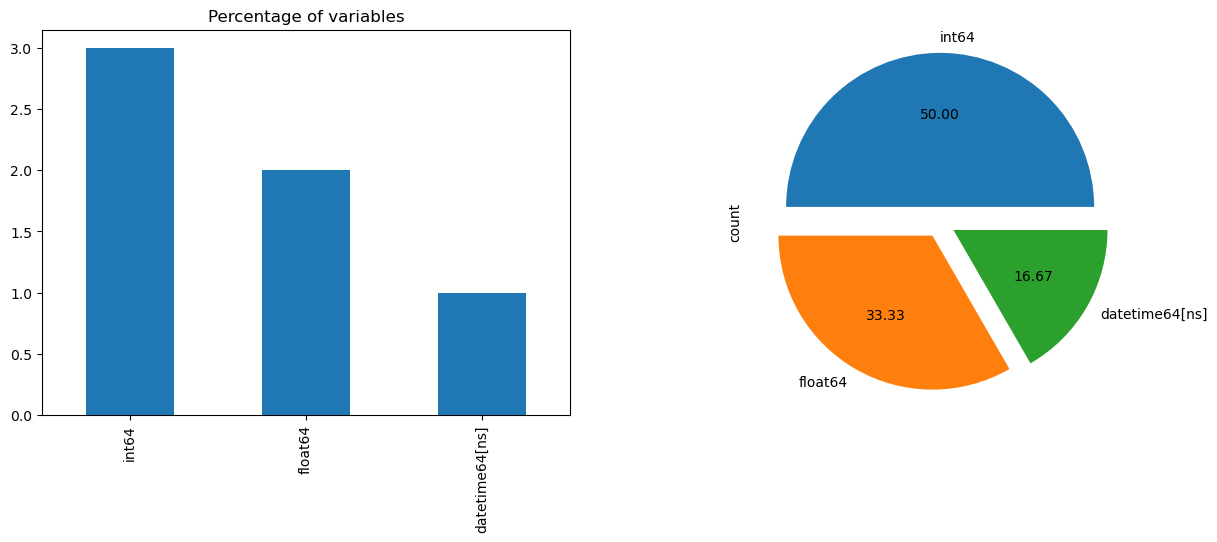

In [7]:
# Determine the counts of each dtype
dtype_counts = df.dtypes.value_counts()

# Plot the bar and pie charts
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Percentage of variables', loc='center')
dtype_counts.plot(kind='bar', ax=ax1)

# Pie chart
ax2 = plt.subplot(1, 2, 2)
explode = [0.1] * len(dtype_counts)  # Adjusting explode to match the number of slices
dtype_counts.plot(kind='pie', autopct='%0.2f', ax=ax2, explode=explode)

plt.show()

# Data Visualization

In [8]:
#converting datetime column to pandas datetime for train and test data(Kaggle)
date_time = pd.to_datetime(df.pop('datetime'), format='%Y.%m.%d %H:%M:%S')

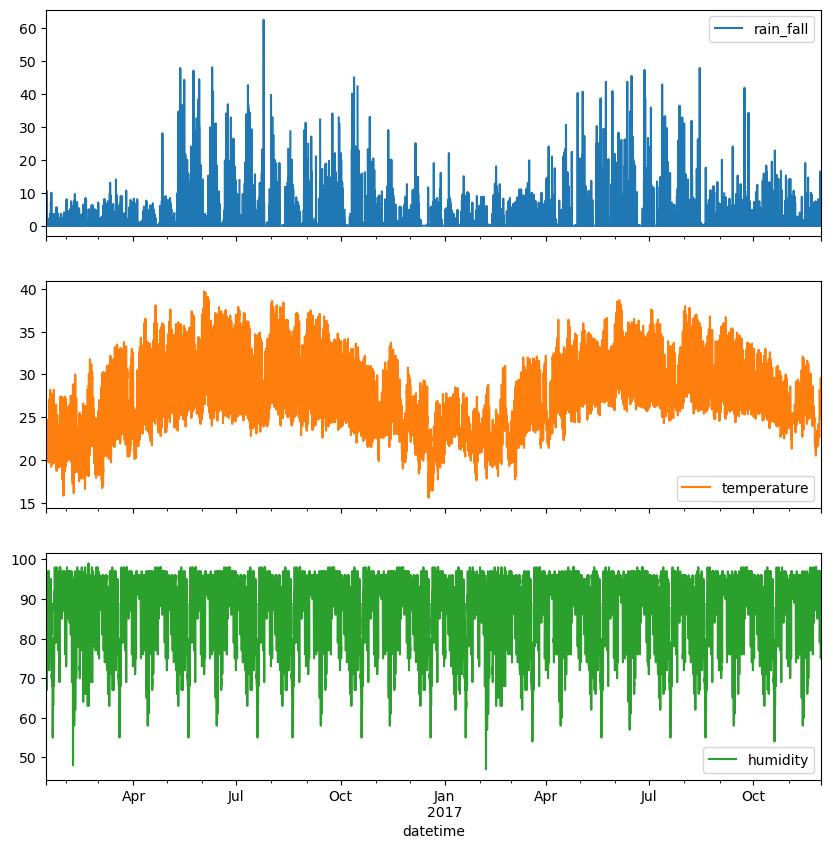

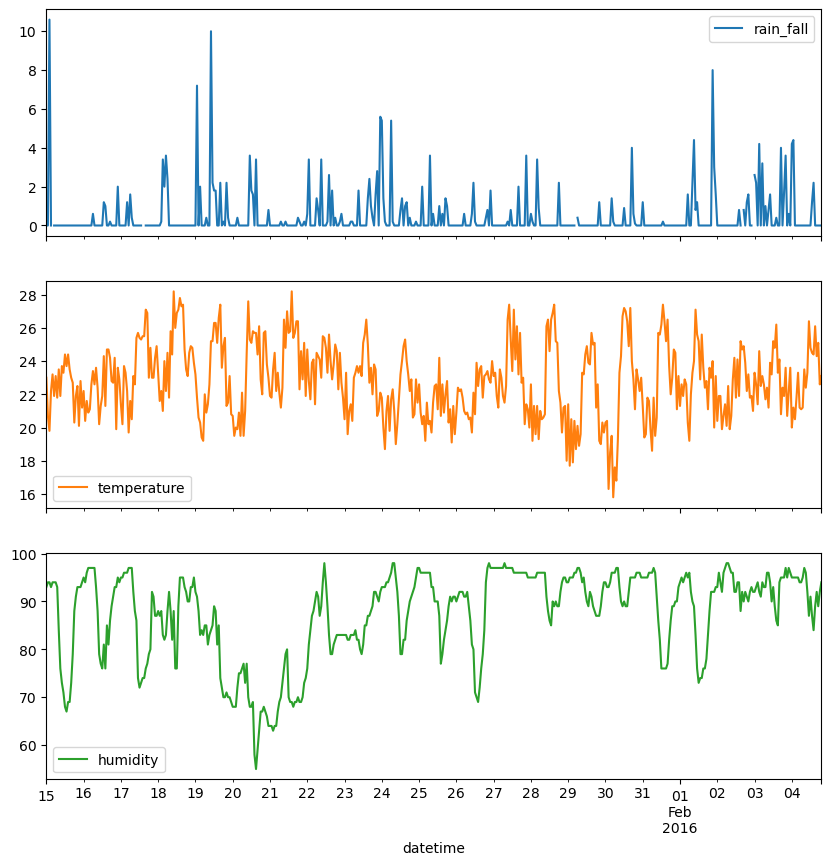

In [9]:
#plotting temperature, humidity and pressure for full data and first 500 values
plot_cols = ['rain_fall', 'temperature', 'humidity']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True,figsize=(10,10))

plot_features = df[plot_cols][:500]
plot_features.index = date_time[:500]
_ = plot_features.plot(subplots=True,figsize=(10,10))

In [10]:
df.describe()

,rain_fall,temperature,humidity,wind_speed,wind_direction
count,16070.000000,16441.000000,16441.000000,16441.000000,16441.000000
mean,1.275072,27.129141,88.151147,2.324068,185.938994
std,3.999052,4.001874,8.816331,1.901871,110.713426
min,0.000000,15.600000,47.000000,0.000000,0.000000
25%,0.000000,24.500000,84.000000,1.000000,100.000000
50%,0.000000,26.800000,92.000000,2.000000,197.000000
75%,0.200000,29.600000,95.000000,3.000000,295.000000
max,62.400000,39.700000,99.000000,13.000000,360.000000


In [11]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
rain_fall,371,2.256554,float64
temperature,0,0.000000,float64
humidity,0,0.000000,int64
wind_speed,0,0.000000,int64
wind_direction,0,0.000000,int64


In [12]:
zero_percentage = (df['rain_fall'] == 0).mean() * 100

In [13]:
zero_percentage

69.18070676966121

In [14]:
df.head(20)

,rain_fall,temperature,humidity,wind_speed,wind_direction
0,0.0,23.0,93,4,0
1,0.0,20.7,94,4,4
2,10.6,19.8,94,4,18
3,0.0,22.2,93,4,31
4,NaN,23.2,94,4,44
5,0.0,21.9,94,4,57
6,0.0,23.1,94,4,70
7,0.0,21.8,93,4,83
8,0.0,23.5,84,4,96
9,0.0,21.9,76,4,109


# Data Preprocessing

In [15]:
#filling missing values with backward fill for train set and test set(Kaggle)
df=df.fillna(method="bfill")

In [16]:
df.head(20)

,rain_fall,temperature,humidity,wind_speed,wind_direction
0,0.0,23.0,93,4,0
1,0.0,20.7,94,4,4
2,10.6,19.8,94,4,18
3,0.0,22.2,93,4,31
4,0.0,23.2,94,4,44
5,0.0,21.9,94,4,57
6,0.0,23.1,94,4,70
7,0.0,21.8,93,4,83
8,0.0,23.5,84,4,96
9,0.0,21.9,76,4,109


In [17]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
rain_fall,0,0.0,float64
temperature,0,0.0,float64
humidity,0,0.0,int64
wind_speed,0,0.0,int64
wind_direction,0,0.0,int64


Text(0, 0.5, 'Wind speed')

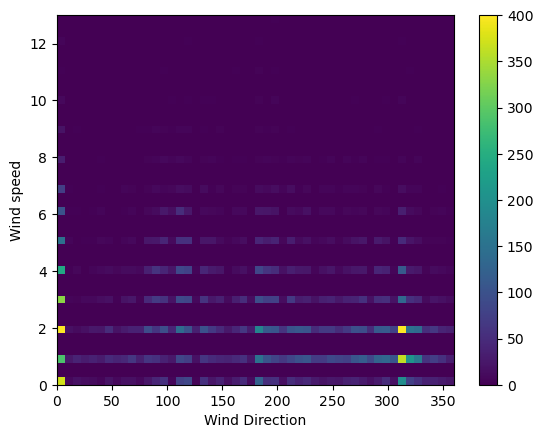

In [18]:
#plotting wind direction vs wind speed for train set
plt.hist2d(df['wind_direction'], df['wind_speed'], bins=(50, 50),vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction')
plt.ylabel('Wind speed')

In [19]:
# converting wind direction and wind speed into single vector for train set and test set(kaggle)
wind_speed = df.pop('wind_speed')

# Converting to radians.
wd_rad = df.pop('wind_direction')*np.pi / 180

# Calculate the wind x and y components.
df['Wind_x'] = wind_speed*np.cos(wd_rad)
df['Wind_y'] = wind_speed*np.sin(wd_rad)

In [20]:
df

,rain_fall,temperature,humidity,Wind_x,Wind_y
0,0.0,23.0,93,4.000000,0.000000
1,0.0,20.7,94,3.990256,0.279026
2,10.6,19.8,94,3.804226,1.236068
3,0.0,22.2,93,3.428669,2.060152
4,0.0,23.2,94,2.877359,2.778633
...,...,...,...,...,...
16436,2.0,25.9,93,0.483844,-1.940591
16437,0.6,25.5,94,0.207912,-0.978148
16438,0.0,25.3,95,0.243739,-1.985092
16439,0.0,25.3,96,-1.059839,-1.696096


(-12.21600407021681, 12.0, -11.817693036146496, 11.0)

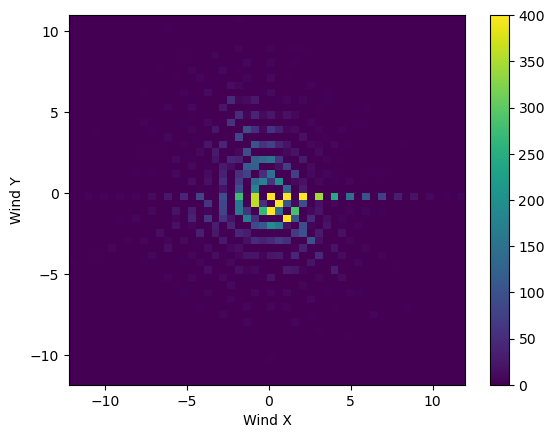

In [21]:
#plotting the x and y components of wind vector train set
plt.hist2d(df['Wind_x'], df['Wind_y'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X')
plt.ylabel('Wind Y')
ax = plt.gca()
ax.axis('tight')

In [22]:
#converting train set and test set date time to sin and cos components for periodicity
timestamp_h = date_time.map(datetime.datetime.timestamp)/3600

In [23]:
day = 24
year = (365.2425)*day

df['Day_sin'] = np.sin(timestamp_h * (2 * np.pi / day))
df['Day_cos'] = np.cos(timestamp_h * (2 * np.pi / day))
df['Year_sin'] = np.sin(timestamp_h * (2 * np.pi / year))
df['Year_cos'] = np.cos(timestamp_h * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

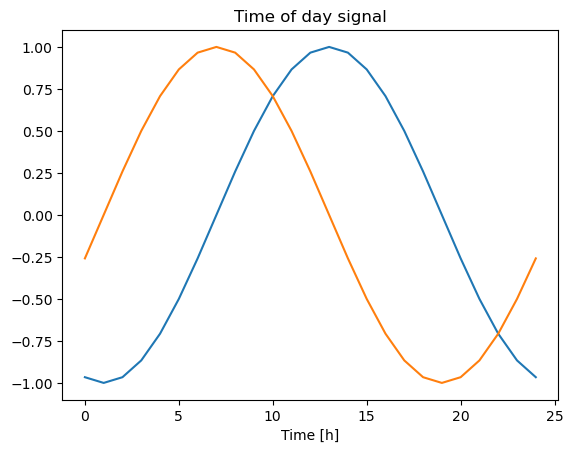

In [24]:
#plotting time signal for train set
plt.plot(np.array(df['Day_sin'])[:25])
plt.plot(np.array(df['Day_cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [25]:
df

,rain_fall,temperature,humidity,Wind_x,Wind_y,Day_sin,Day_cos,Year_sin,Year_cos
0,0.0,23.0,93,4.000000,0.000000,-0.965926,-2.588190e-01,0.231048,0.972942
1,0.0,20.7,94,3.990256,0.279026,-1.000000,-1.142458e-11,0.231746,0.972776
2,10.6,19.8,94,3.804226,1.236068,-0.965926,2.588190e-01,0.232443,0.972610
3,0.0,22.2,93,3.428669,2.060152,-0.866025,5.000000e-01,0.233140,0.972443
4,0.0,23.2,94,2.877359,2.778633,-0.707107,7.071068e-01,0.233837,0.972276
...,...,...,...,...,...,...,...,...,...
16436,2.0,25.9,93,0.483844,-1.940591,-0.258819,-9.659258e-01,-0.524545,0.851383
16437,0.6,25.5,94,0.207912,-0.978148,-0.500000,-8.660254e-01,-0.523935,0.851759
16438,0.0,25.3,95,0.243739,-1.985092,-0.707107,-7.071068e-01,-0.523324,0.852134
16439,0.0,25.3,96,-1.059839,-1.696096,-0.866025,-5.000000e-01,-0.522713,0.852509


# Train, Val, Test Split

In [26]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]
num_features = df.shape[1]

# Data Normalizing

In [27]:
#normalizing train, validation and test set
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std

test_mean=test_df.mean()
test_std=test_df.std()

test_df=(test_df-train_mean)/train_std

In [28]:
df

,rain_fall,temperature,humidity,Wind_x,Wind_y,Day_sin,Day_cos,Year_sin,Year_cos
0,0.0,23.0,93,4.000000,0.000000,-0.965926,-2.588190e-01,0.231048,0.972942
1,0.0,20.7,94,3.990256,0.279026,-1.000000,-1.142458e-11,0.231746,0.972776
2,10.6,19.8,94,3.804226,1.236068,-0.965926,2.588190e-01,0.232443,0.972610
3,0.0,22.2,93,3.428669,2.060152,-0.866025,5.000000e-01,0.233140,0.972443
4,0.0,23.2,94,2.877359,2.778633,-0.707107,7.071068e-01,0.233837,0.972276
...,...,...,...,...,...,...,...,...,...
16436,2.0,25.9,93,0.483844,-1.940591,-0.258819,-9.659258e-01,-0.524545,0.851383
16437,0.6,25.5,94,0.207912,-0.978148,-0.500000,-8.660254e-01,-0.523935,0.851759
16438,0.0,25.3,95,0.243739,-1.985092,-0.707107,-7.071068e-01,-0.523324,0.852134
16439,0.0,25.3,96,-1.059839,-1.696096,-0.866025,-5.000000e-01,-0.522713,0.852509


In [29]:
train_df

,rain_fall,temperature,humidity,Wind_x,Wind_y,Day_sin,Day_cos,Year_sin,Year_cos
0,-0.330727,-0.854429,0.544378,1.755064,0.068806,-1.365606,-0.366879,0.058871,1.341762
1,-0.330727,-1.418338,0.657392,1.750686,0.210579,-1.413792,-0.000870,0.059851,1.341516
2,2.183585,-1.638998,0.657392,1.667097,0.696849,-1.365606,0.365140,0.060831,1.341269
3,-0.330727,-1.050571,0.544378,1.498346,1.115564,-1.224331,0.706207,0.061810,1.341021
4,-0.330727,-0.805394,0.657392,1.250625,1.480622,-0.999596,0.999087,0.062789,1.340772
...,...,...,...,...,...,...,...,...,...
11503,2.183585,0.641154,0.657392,0.311811,0.381622,0.000360,1.413283,0.874124,-0.973072
11504,-0.140967,1.205062,0.770406,0.252521,-0.314659,0.366370,1.365097,0.873535,-0.973936
11505,-0.330727,1.548311,0.657392,-0.378915,1.011005,0.707436,1.223822,0.872946,-0.974799
11506,-0.330727,1.842524,-0.020692,-0.042269,0.068806,1.000317,0.999087,0.872355,-0.975663


In [30]:
val_df

,rain_fall,temperature,humidity,Wind_x,Wind_y,Day_sin,Day_cos,Year_sin,Year_cos
11508,-0.330727,2.038666,-1.489872,-0.042269,0.068806,1.366326,0.365140,0.871174,-0.977388
11509,-0.330727,1.916077,-1.715900,0.275458,-0.290473,1.414512,-0.000870,0.870582,-0.978250
11510,-0.330727,1.695417,-0.924803,0.407065,0.068806,1.366326,-0.366879,0.869989,-0.979111
11511,-0.330727,1.327651,-1.828914,0.407065,0.068806,1.225052,-0.707946,0.869396,-0.979972
11512,-0.330727,0.959885,-1.828914,-0.042269,1.085001,1.000317,-1.000827,0.868803,-0.980833
...,...,...,...,...,...,...,...,...,...
14791,-0.330727,-0.020826,0.996433,0.735999,0.576903,0.000360,1.413283,-1.652516,-0.341792
14792,-0.330727,0.273387,1.109447,1.755064,0.068806,0.366370,1.365097,-1.652676,-0.340741
14793,-0.283287,0.641154,0.318350,1.113035,-1.488094,0.707436,1.223822,-1.652836,-0.339689
14794,0.665510,0.812778,-0.246720,1.113035,-1.488094,1.000317,0.999087,-1.652995,-0.338637


In [31]:
test_df

,rain_fall,temperature,humidity,Wind_x,Wind_y,Day_sin,Day_cos,Year_sin,Year_cos
14796,-0.330727,0.592118,-1.376859,0.802202,-0.278753,1.366326,0.365140,-1.653311,-0.336533
14797,-0.330727,0.641154,-1.376859,0.646150,-0.584391,1.414512,-0.000870,-1.653468,-0.335480
14798,-0.330727,0.837296,-0.133706,0.856398,-1.691294,1.366326,-0.366879,-1.653625,-0.334428
14799,-0.330727,0.959885,0.431364,0.535383,-0.709644,1.225052,-0.707946,-1.653780,-0.333375
14800,1.045029,0.910849,0.657392,0.824209,-1.098869,1.000317,-1.000827,-1.653935,-0.332323
...,...,...,...,...,...,...,...,...,...
16436,0.143672,-0.143414,0.544378,0.175138,-0.917203,-0.365649,-1.366836,-1.002625,1.161093
16437,-0.188407,-0.241485,0.657392,0.051153,-0.428188,-0.706716,-1.225562,-1.001768,1.161652
16438,-0.330727,-0.290521,0.770406,0.067251,-0.939813,-0.999596,-1.000827,-1.000910,1.162210
16439,-0.330727,-0.290521,0.883419,-0.518489,-0.792975,-1.224331,-0.707946,-1.000052,1.162767


# Class

In [32]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [33]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.

  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  print(f'Inputs shape: {inputs.shape}')
  print(f'Labels shape: {labels.shape}')

  return inputs, labels

WindowGenerator.split_window = split_window

In [34]:
def plot(self, model=None, plot_col='rain_fall', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(25, 20))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  width = 0.3  # Độ rộng của cột
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.bar([x - width/2 for x in self.label_indices], labels[n, :, label_col_index], width=width, edgecolor='k', label='Labels', color='#2ca02c')
    if model is not None:
      predictions = model(inputs)
      plt.bar([x + width/2 for x in self.label_indices], predictions[n, :, label_col_index], width=width, color='#ff7f0e', label='Predictions')
      for i, prediction in enumerate(predictions[n, :, label_col_index]):
        plt.text(self.label_indices[i], prediction, f"{prediction:.2f}",
                 color='black', ha='center', va='bottom')
      for i, label in enumerate(labels[n, :, label_col_index]):  # Giả sử labels có cùng shape với predictions
        plt.text(self.label_indices[i], label, f"{label:.2f}",
                 color='red', ha='center', va='bottom')
        
    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot



In [35]:
def plot_original(self, model=None, plot_col='rain_fall', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(25, 20))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  width = 0.3  # Độ rộng của cột
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} (mm)')
    inputs_original = (inputs * train_std) + train_mean
    plt.plot(self.input_indices, inputs_original[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue
    labels_original = (labels * train_std) + train_mean
    # Điều chỉnh vị trí của Labels để không bị chìm bởi Predictions
    plt.bar([x - width/2 for x in self.label_indices], labels_original[n, :, label_col_index], width=width, edgecolor='k', label='Labels', color='#2ca02c')
    
    if model is not None:
      predictions = model(inputs)
      predictions_original = (predictions * train_std) + train_mean
      # Điều chỉnh vị trí của Predictions để không chồng lên Labels
      plt.bar([x + width/2 for x in self.label_indices], predictions_original[n, :, label_col_index], width=width, color='#ff7f0e', label='Predictions')
      
      for i, prediction in enumerate(predictions_original[n, :, label_col_index]):
        plt.text(self.label_indices[i] + width/2, prediction, f"{prediction:.2f}",
                 color='black', ha='center', va='bottom')
    for i, label in enumerate(labels_original[n, :, label_col_index]):
      plt.text(self.label_indices[i] - width/2, label, f"{label:.2f}",
               color='red', ha='center', va='top')
        
    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot_original = plot_original

In [36]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [37]:
# Add properties to access train, validation and test sets
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [38]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  # early stopping is a great feature that will end training if there is no gains being made
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
  # Compile the model using the Adam optimizer and MAE for evaluations
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(), tf.metrics.MeanSquaredError()])
  # Fit the model and store results
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping]) 
  return history

In [39]:
# This function will compile and fit the model and show the results
def show_results(model_name, model, step_window,val_dict, perf_dict):
  start = time.time()
  history = compile_and_fit(model,step_window)
  IPython.display.clear_output()
  val_dict[model_name] = model.evaluate(step_window.val)
  perf_dict[model_name] = model.evaluate(step_window.test, verbose=0)
  end = time.time()
  seconds = end-start
  minutes = seconds / 60
  print(f'>> Runtime: {seconds:.2f} seconds ({minutes:.2f} minutes)')

  return history

In [40]:
wide_window = WindowGenerator(24, 24, 1, train_df, val_df, test_df,
                              label_columns=['rain_fall'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['rain_fall']

Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): ['rain_fall']

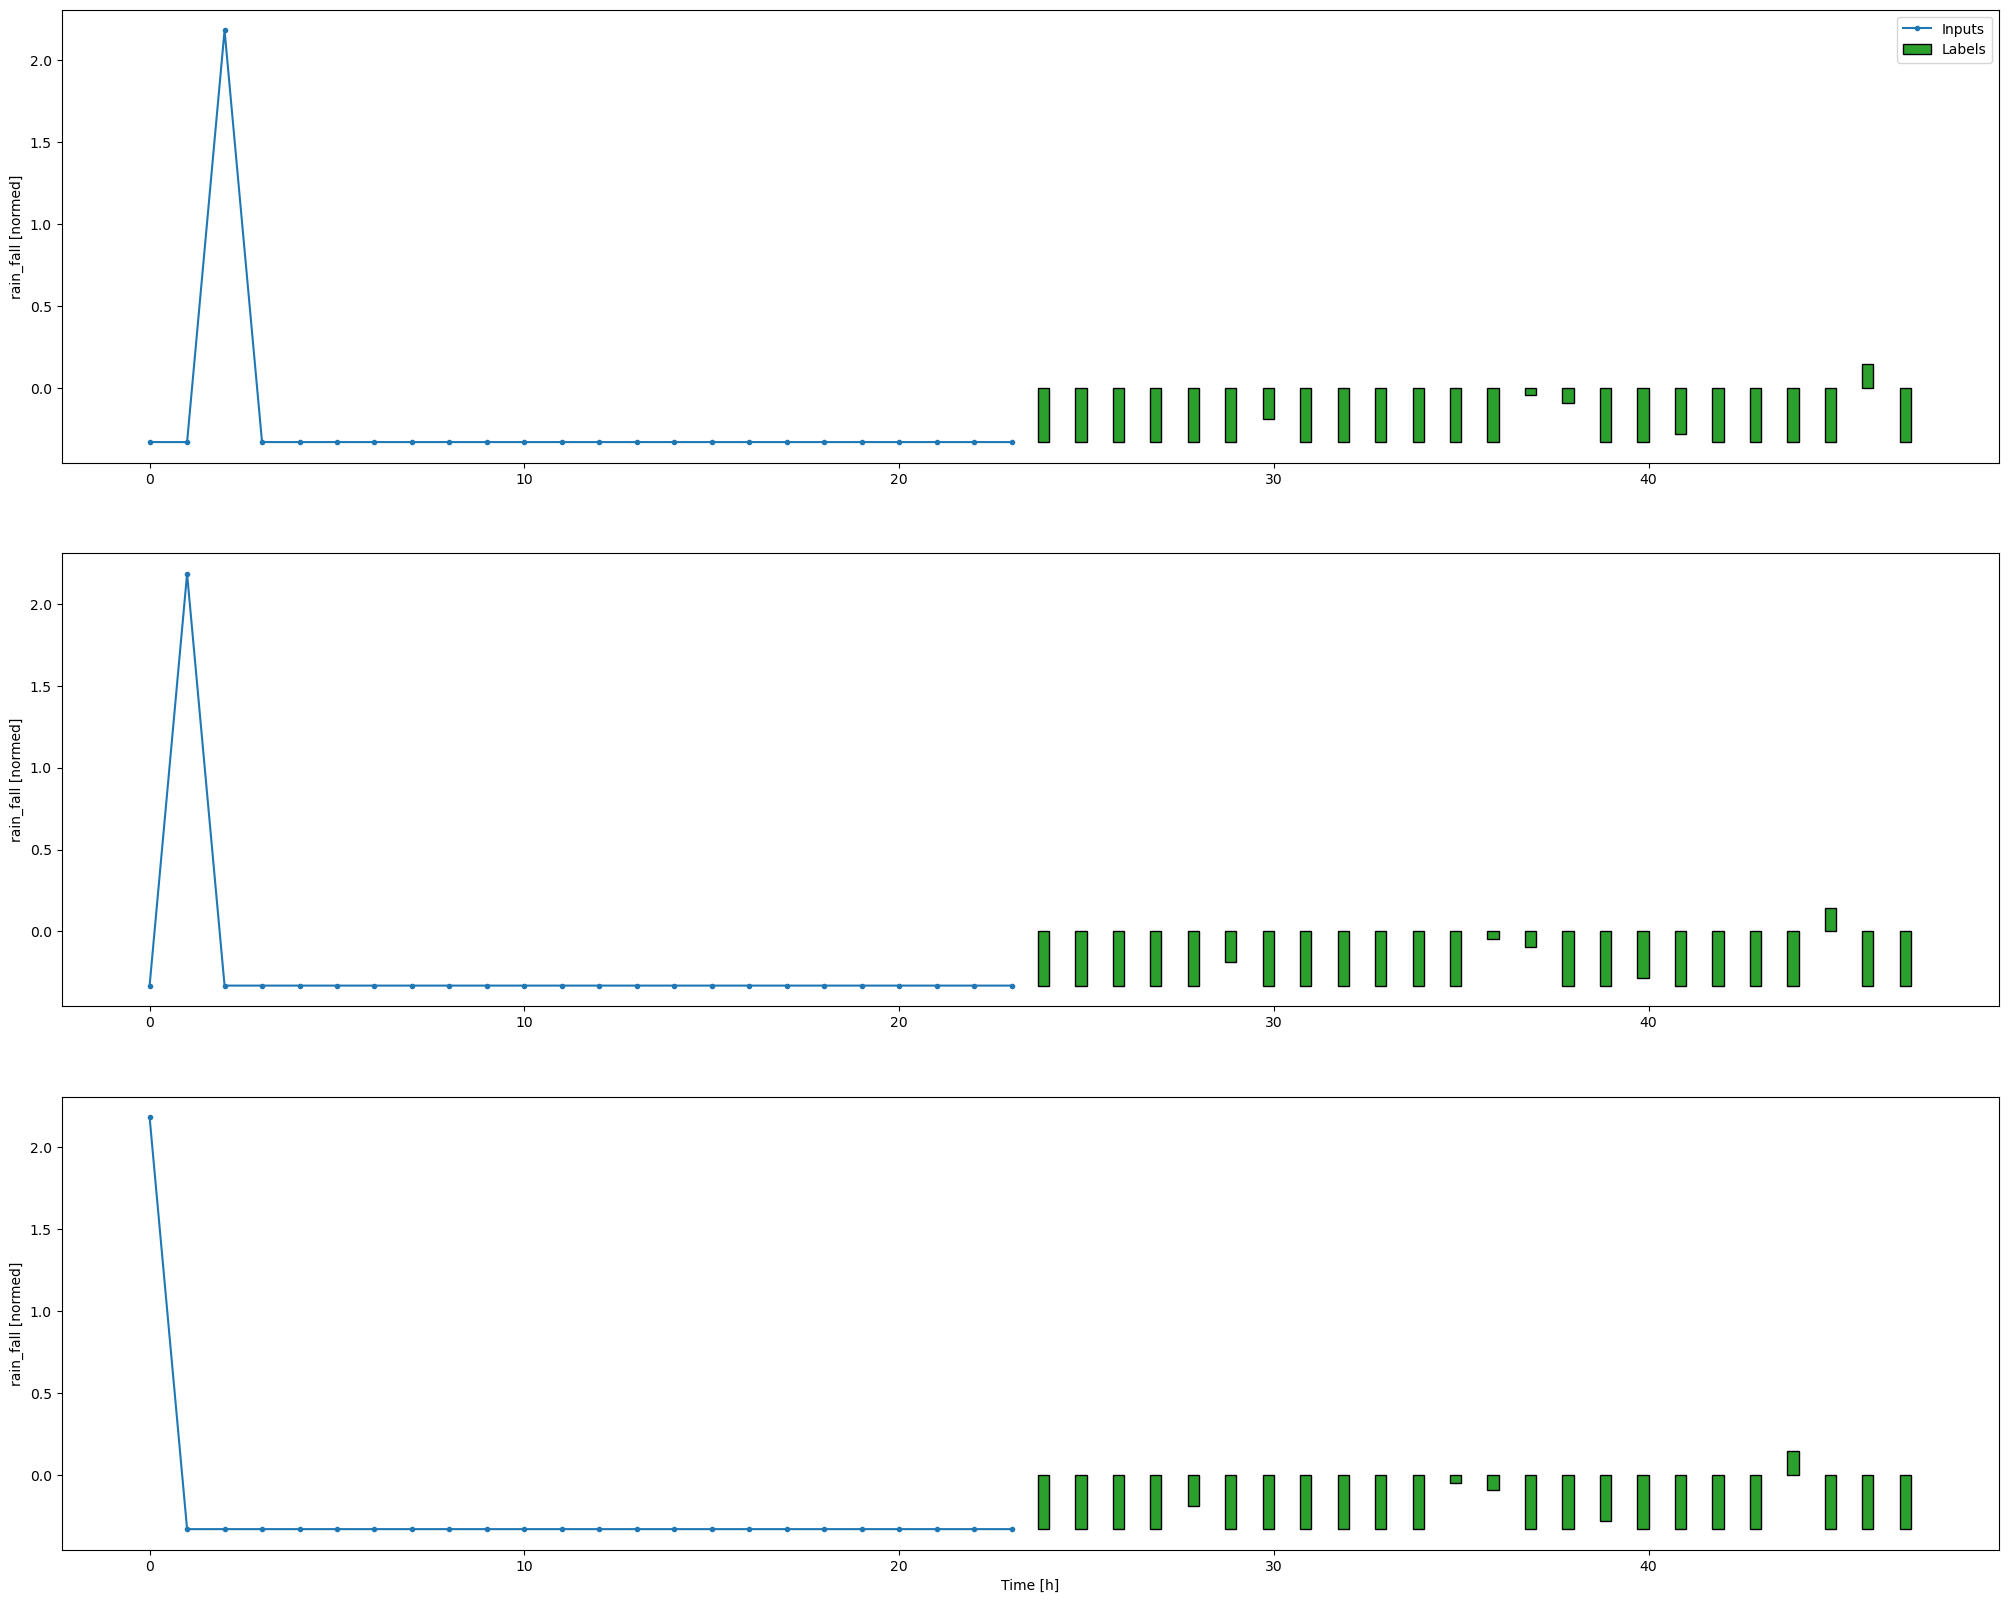

In [41]:
OUT_STEPS=24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               train_df=train_df,
                               val_df=val_df,
                               test_df=test_df,
                               label_columns=['rain_fall'])

multi_window.plot()
multi_window

# Training Multi-step models

Linear model

In [42]:
multi_val_performance = {}
multi_performance = {}

Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
102/102 [==============================] - 0s 1ms/step - loss: 1.2693 - mean_absolute_error: 0.5492 - mean_squared_error: 1.2693
Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
>> Runtime: 3.64 seconds (0.06 minutes)


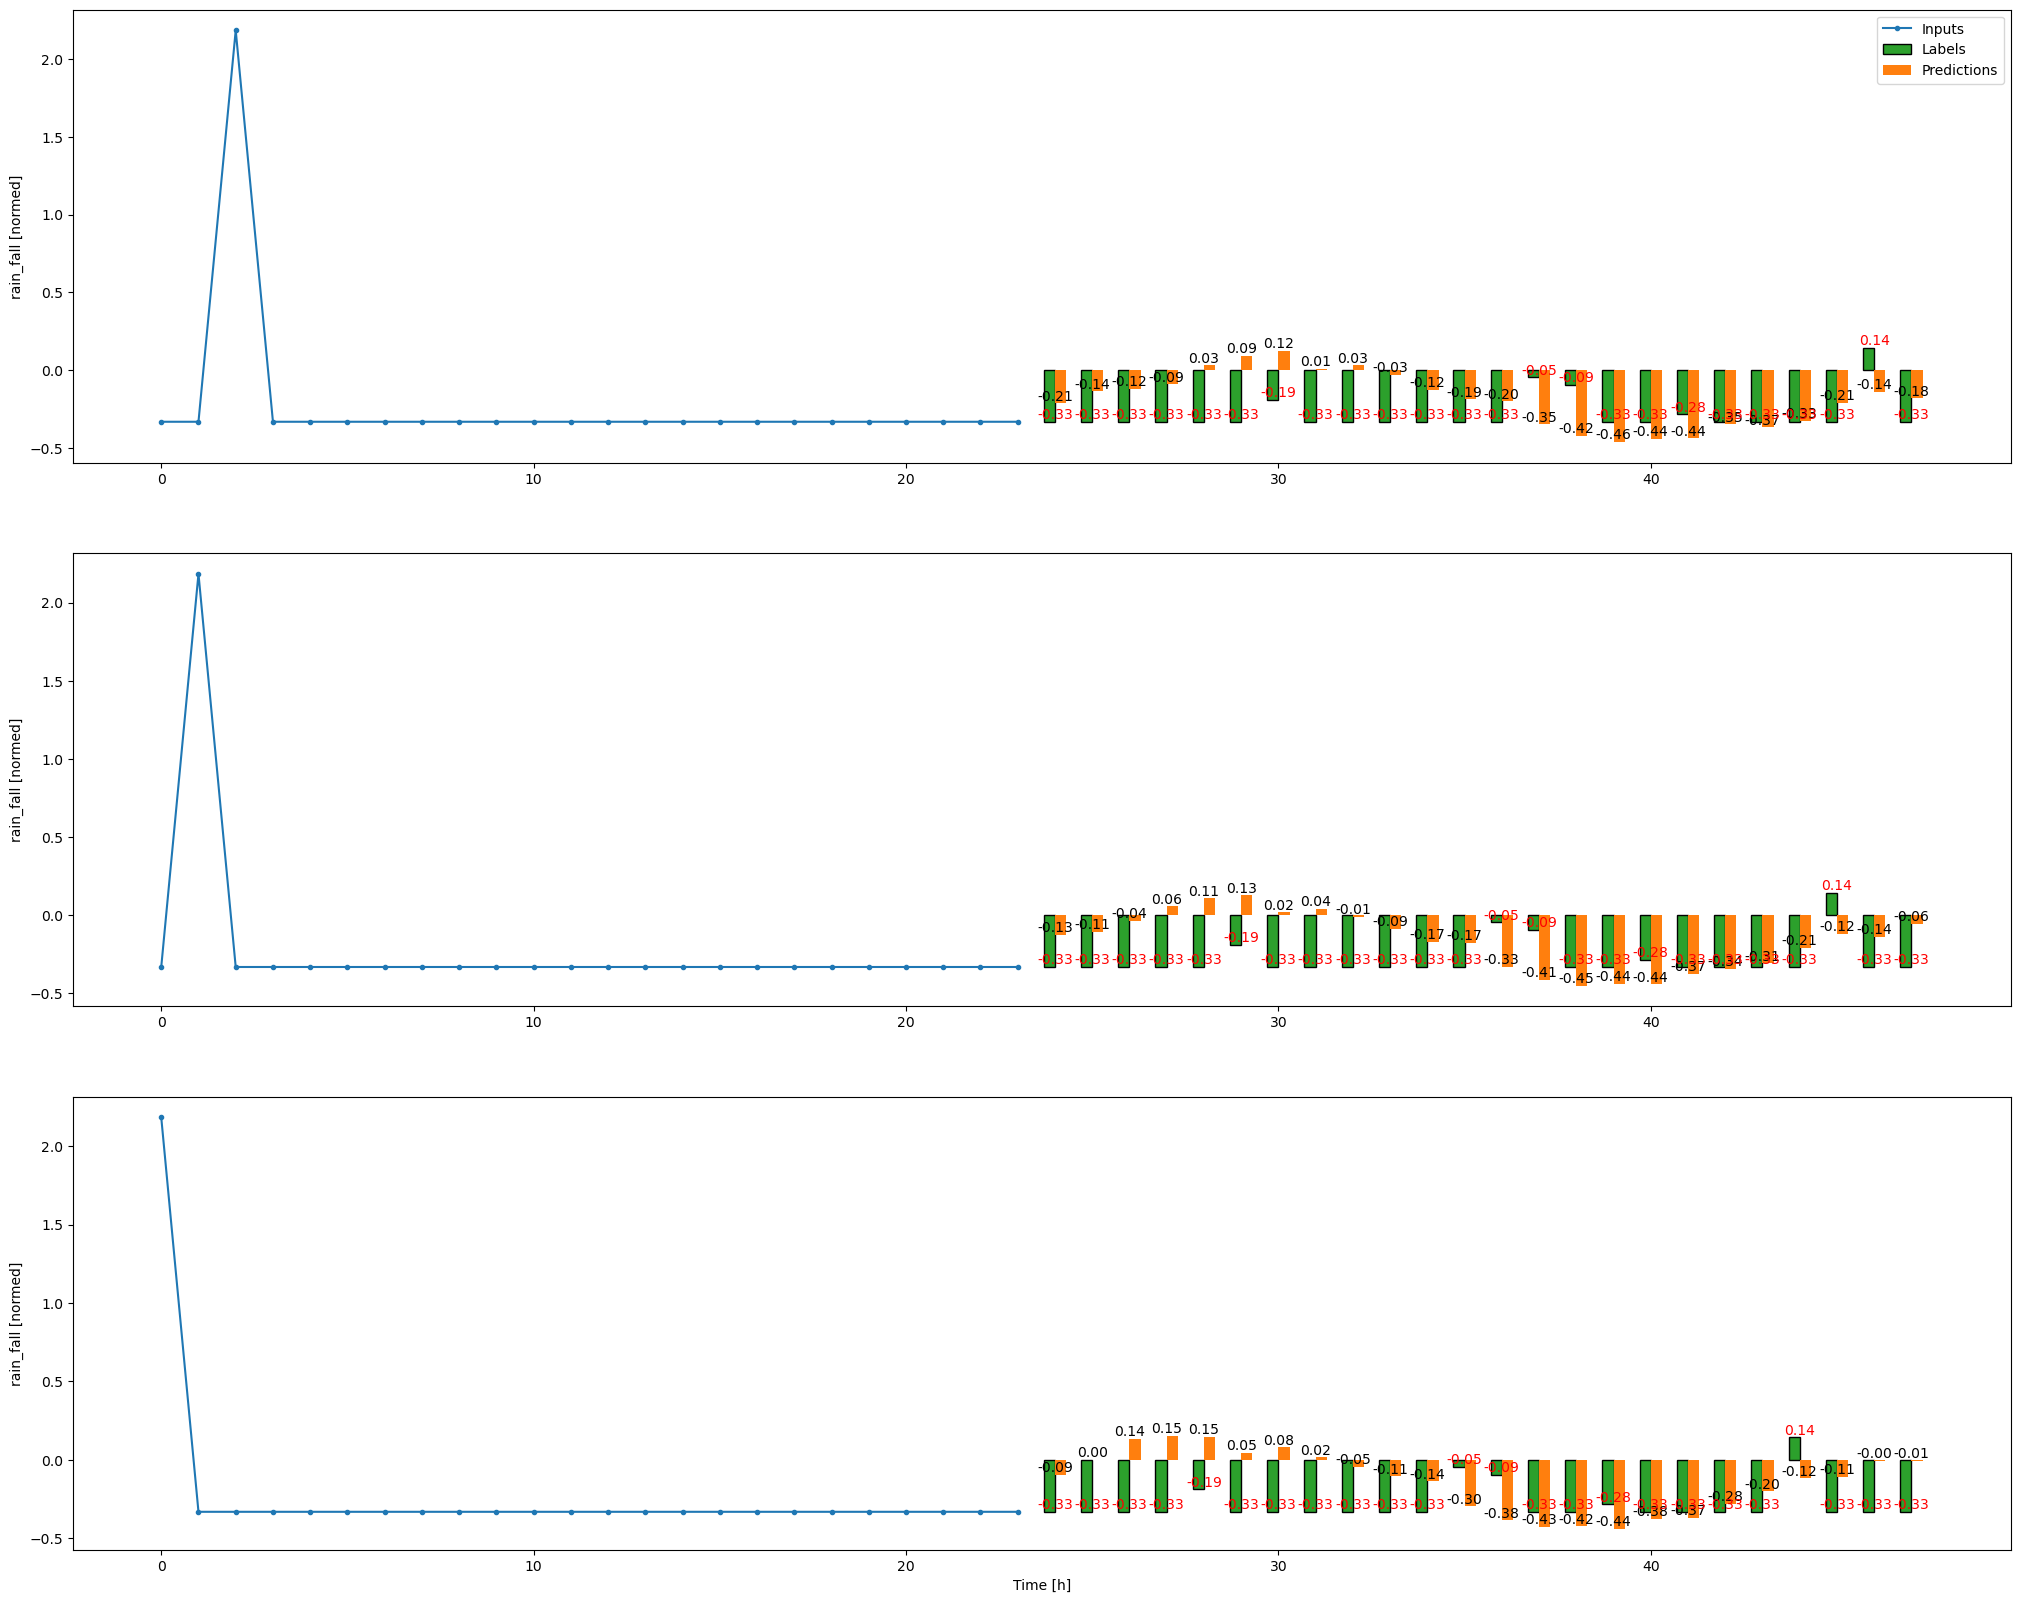

In [43]:
linear_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, time * features]
    tf.keras.layers.Flatten(),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS * num_features, kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = show_results('Linear',linear_model,multi_window,multi_val_performance,multi_performance)

multi_window.plot(linear_model)

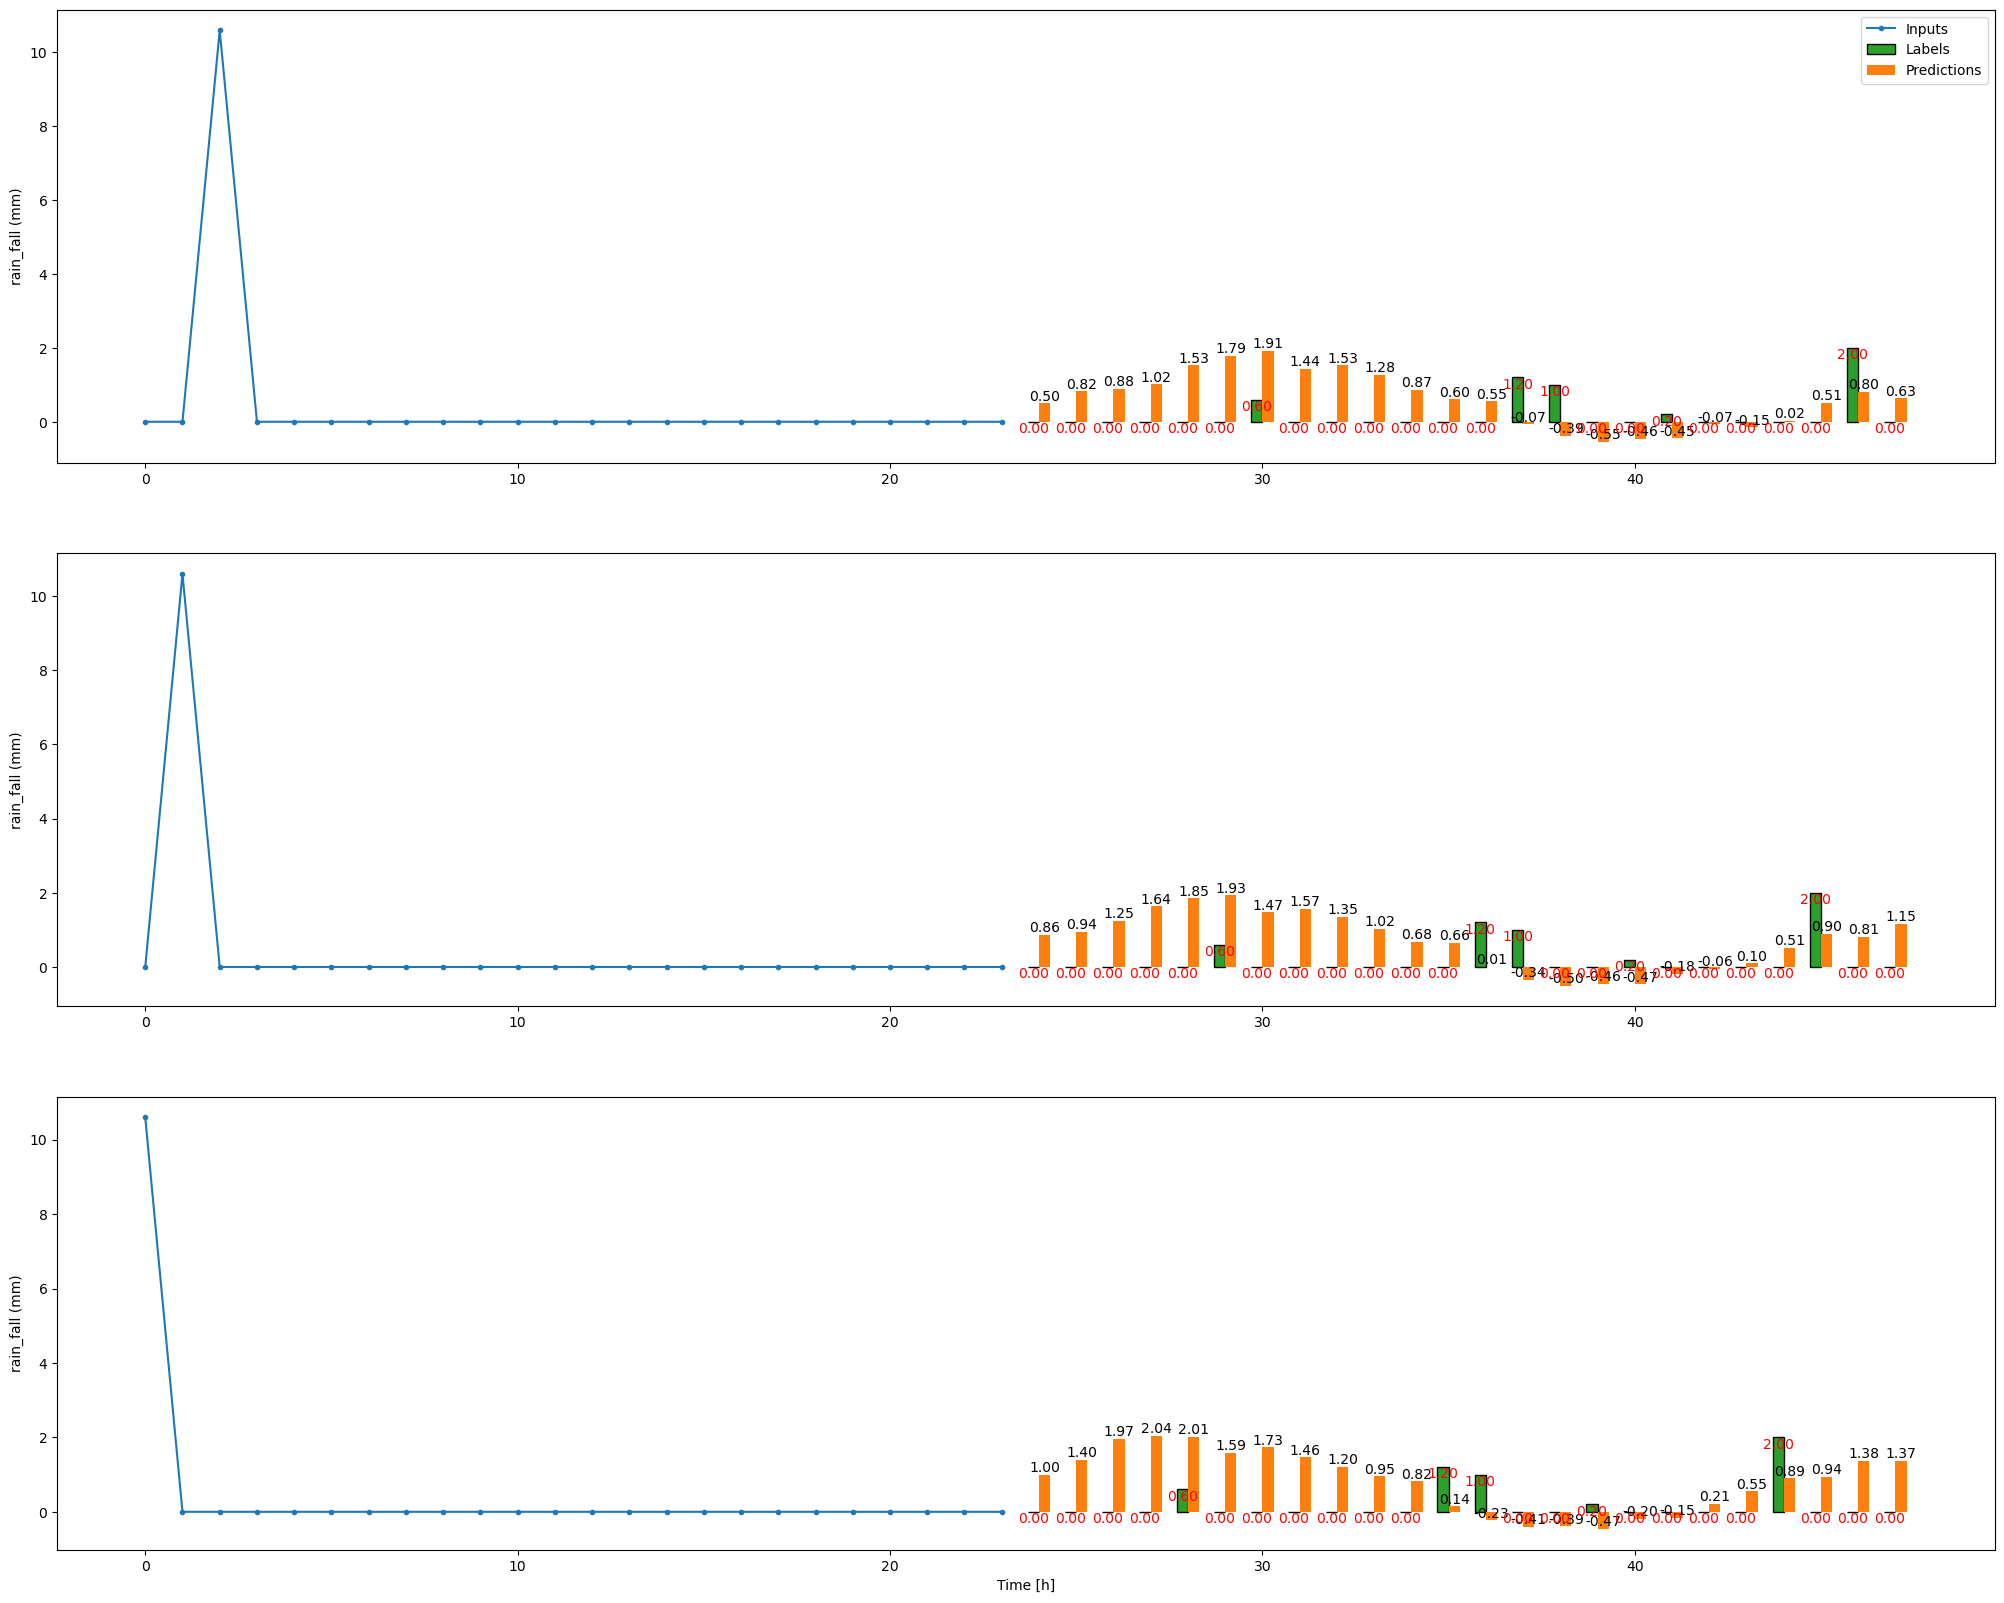

In [44]:
multi_window.plot_original(linear_model)

LSTM Model

Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
102/102 [==============================] - 0s 3ms/step - loss: 1.2447 - mean_absolute_error: 0.5992 - mean_squared_error: 1.2447
Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
>> Runtime: 14.02 seconds (0.23 minutes)


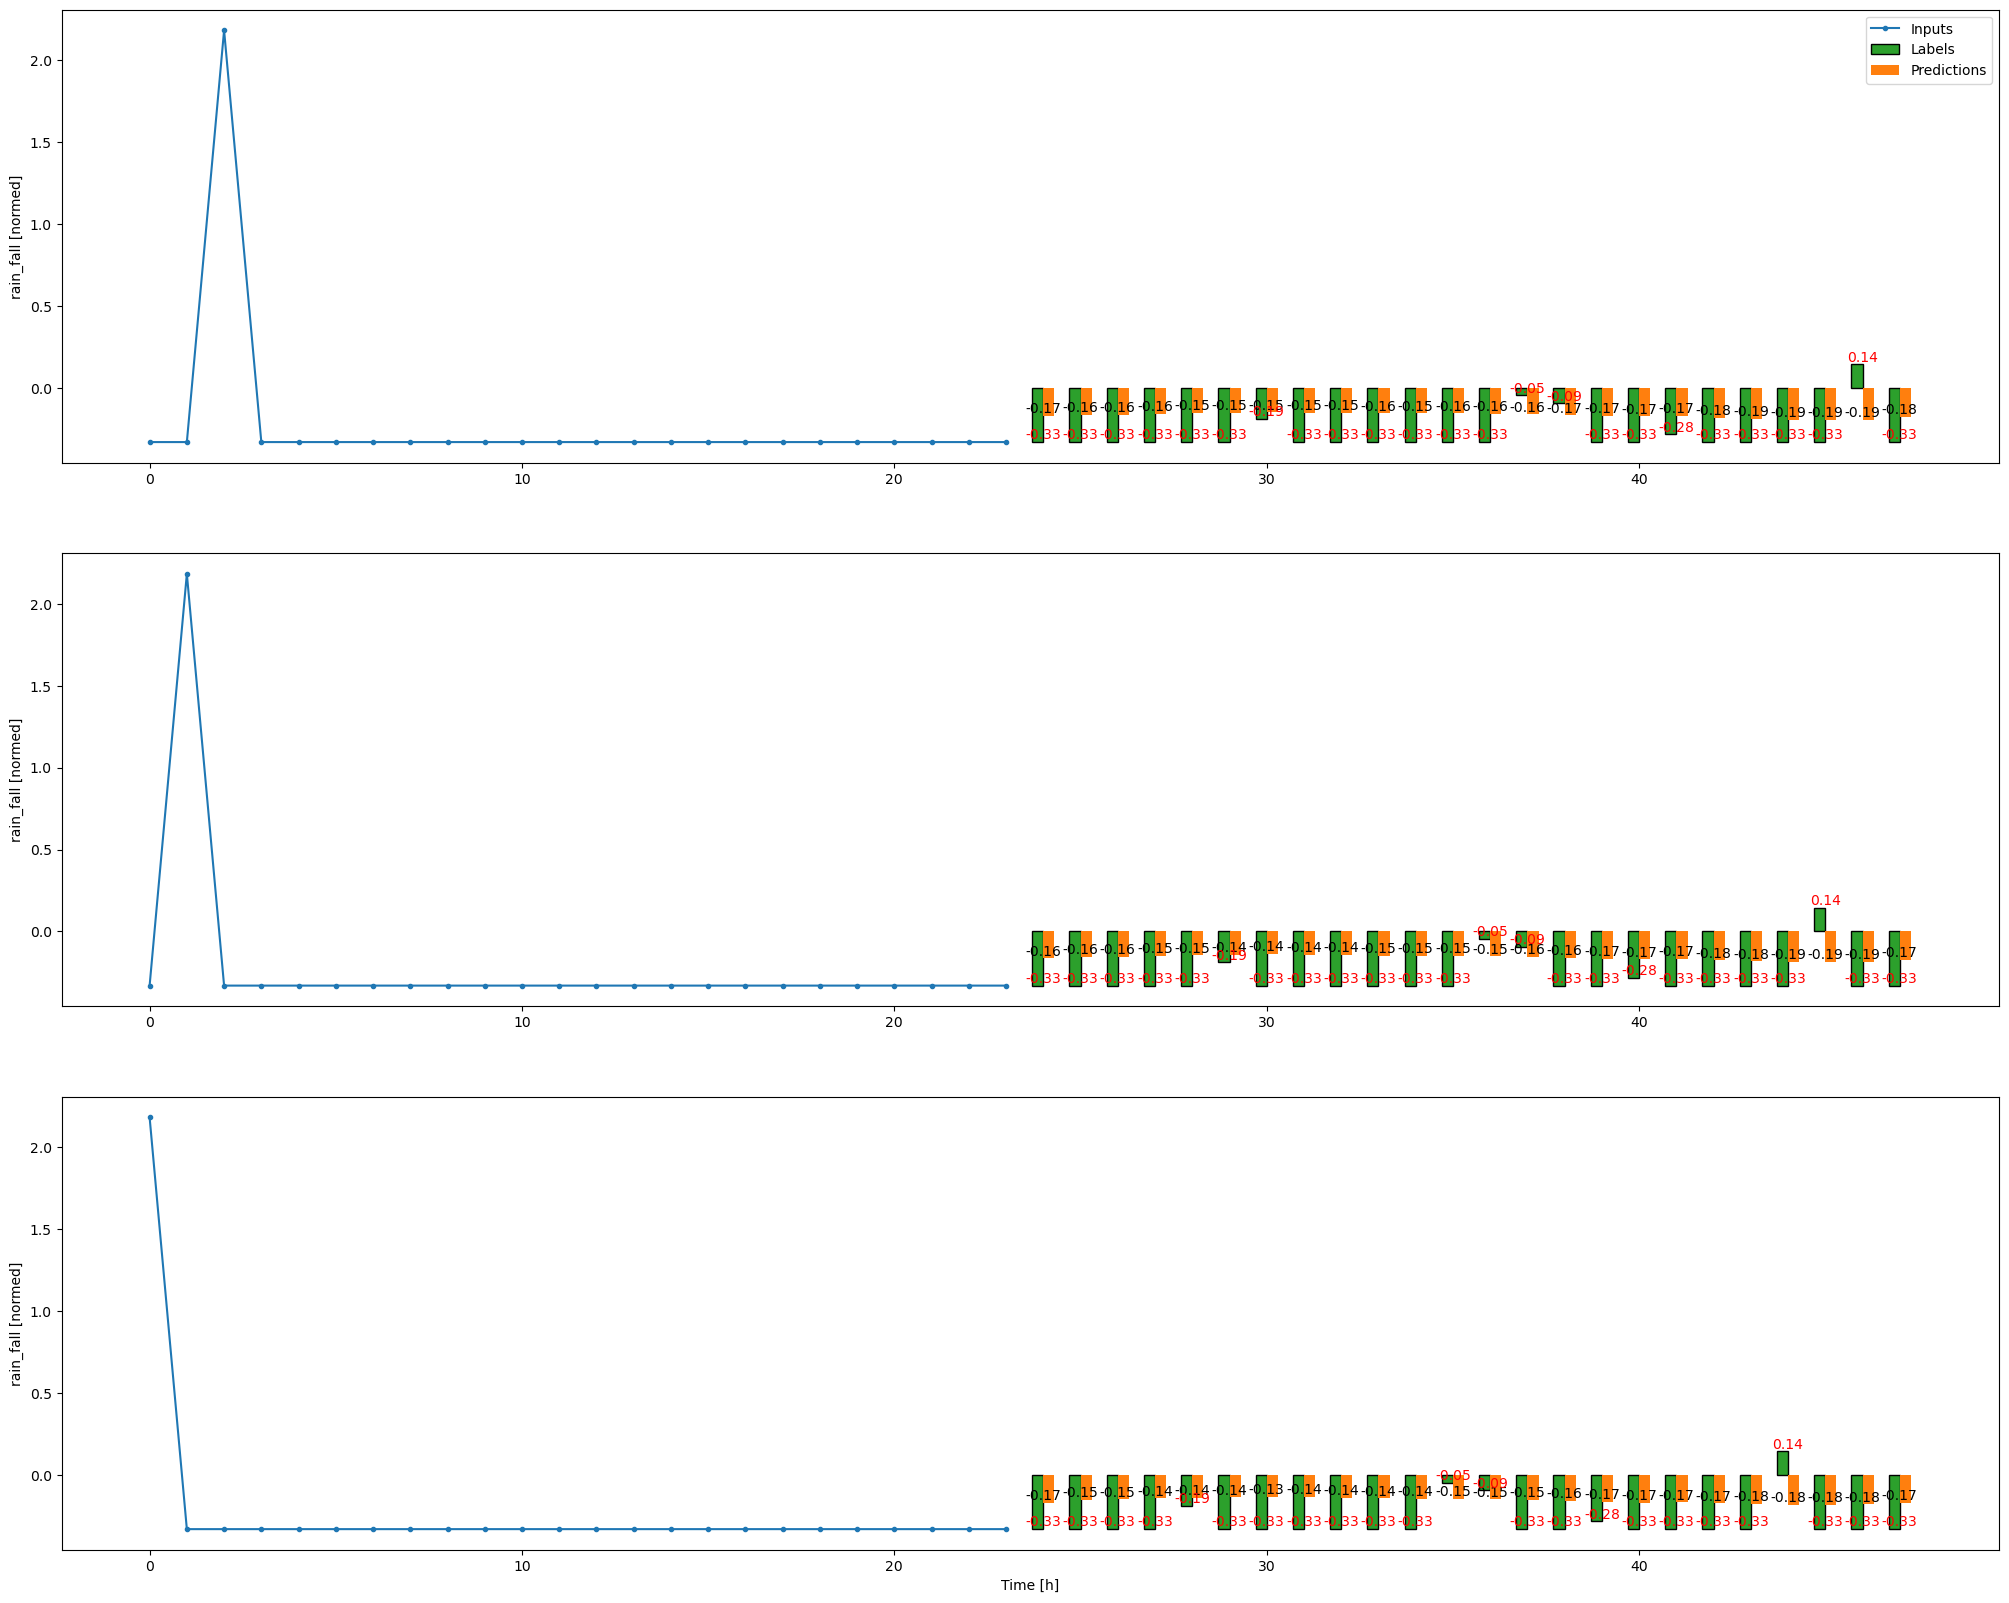

In [45]:
lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = show_results('LSTM',lstm_model,multi_window,multi_val_performance,multi_performance)

multi_window.plot(lstm_model)

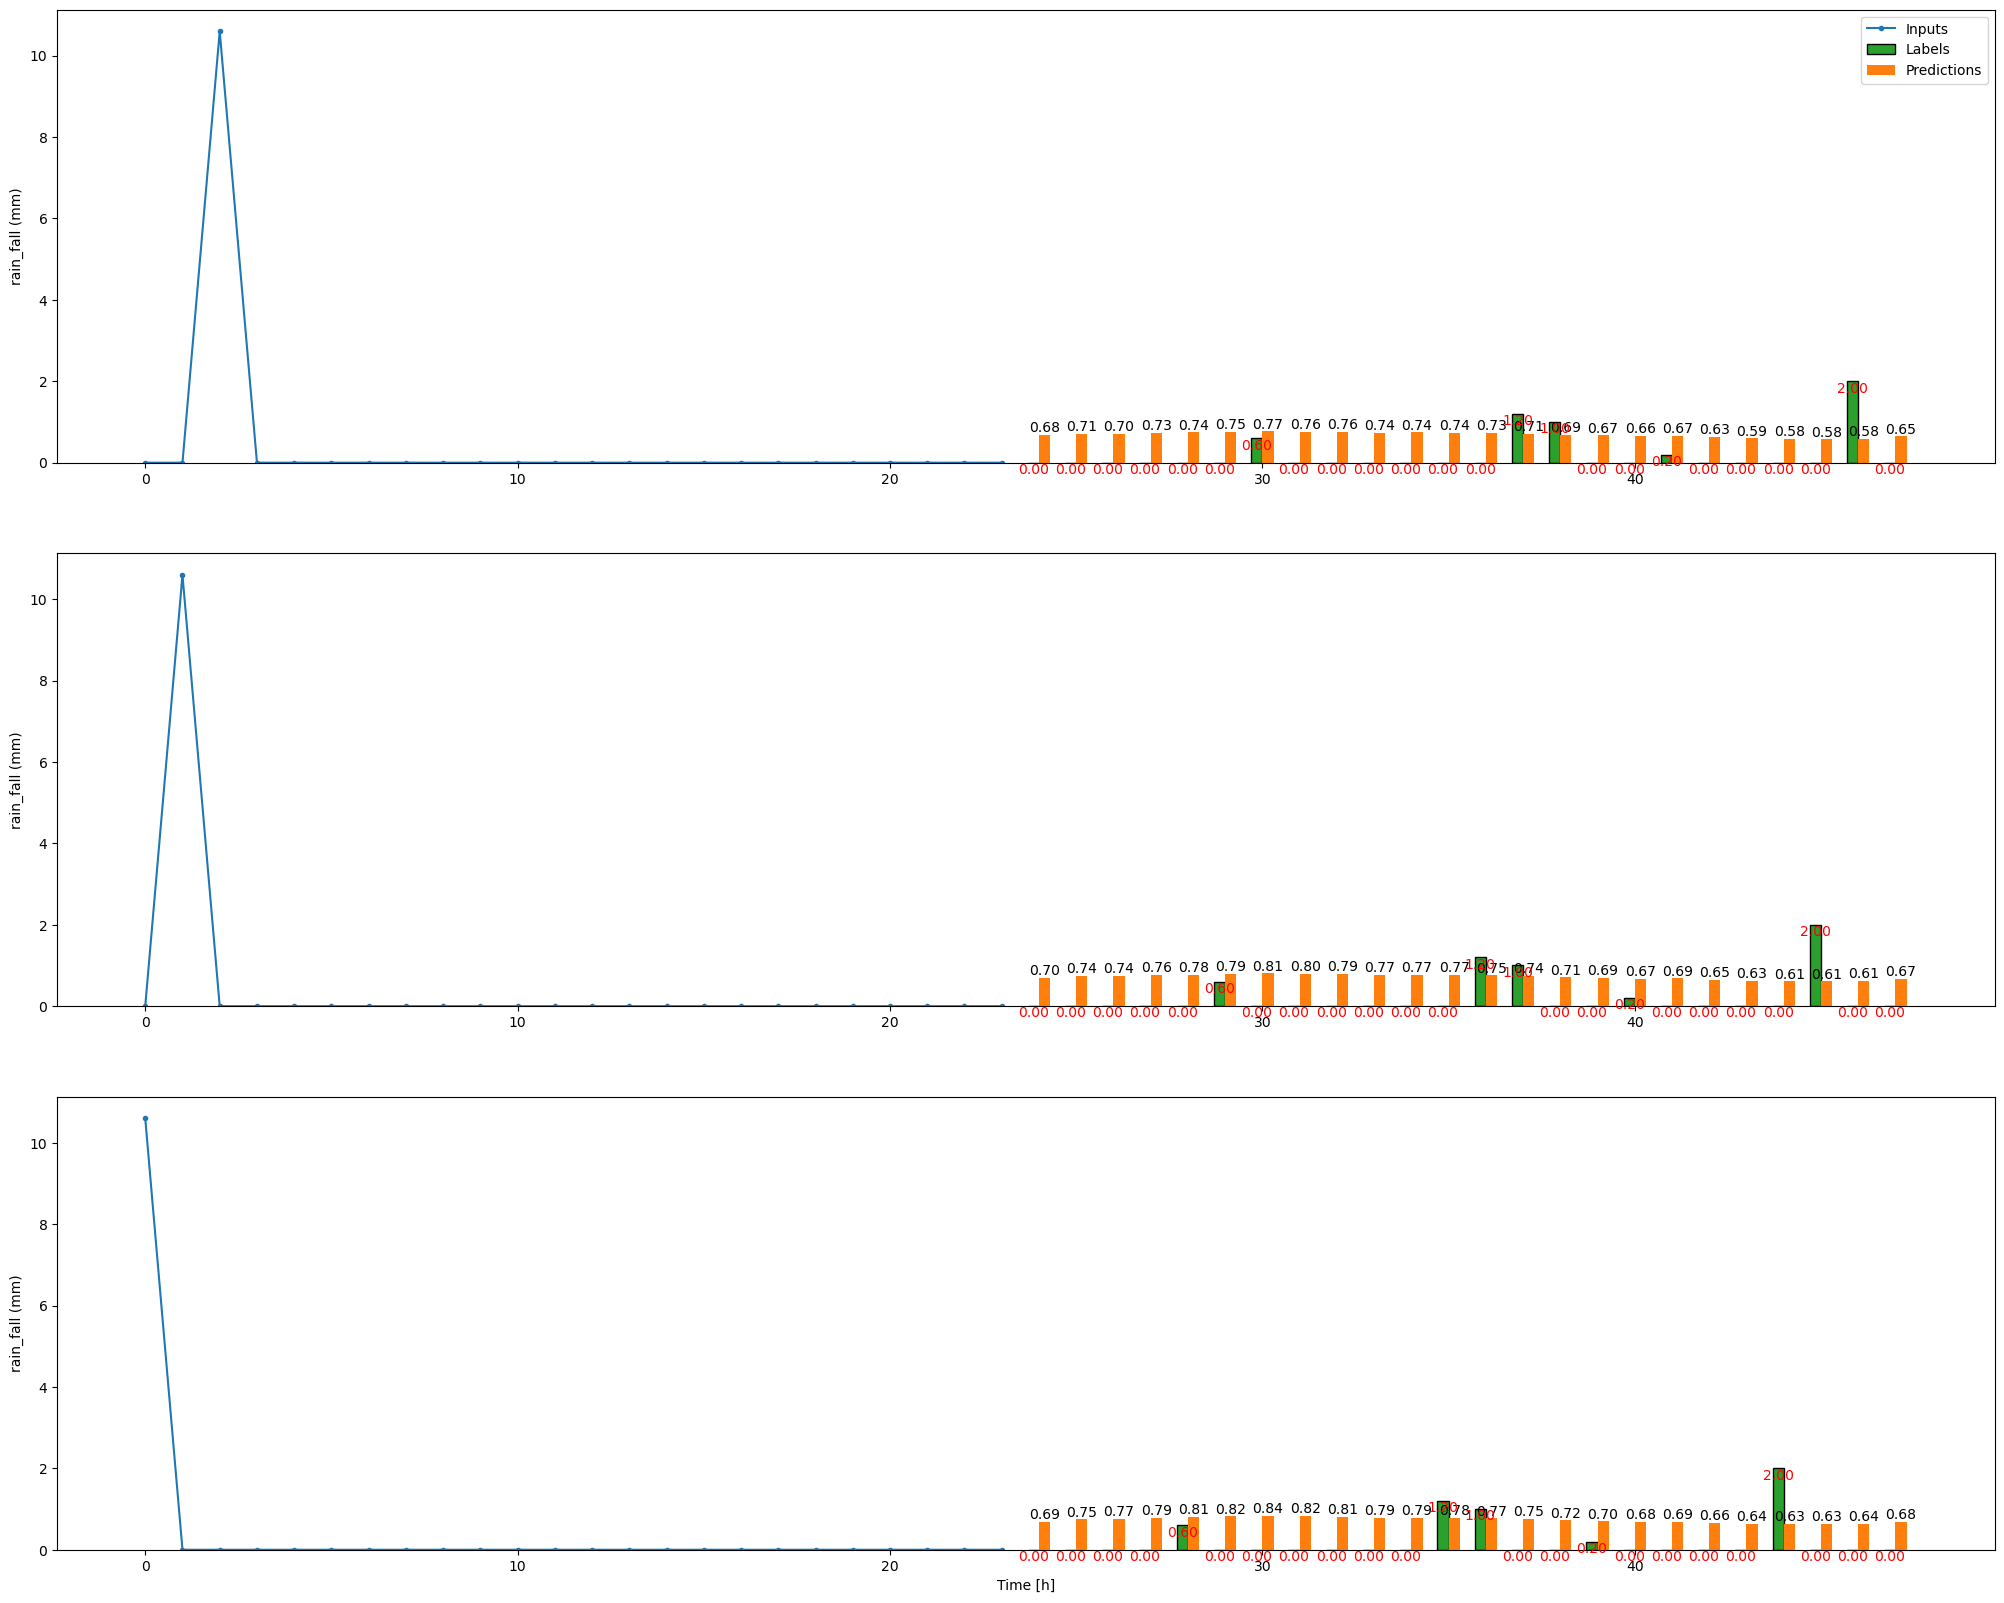

In [46]:
multi_window.plot_original(lstm_model)

GRU

Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
102/102 [==============================] - 0s 3ms/step - loss: 1.2337 - mean_absolute_error: 0.6100 - mean_squared_error: 1.2337
Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
>> Runtime: 16.48 seconds (0.27 minutes)


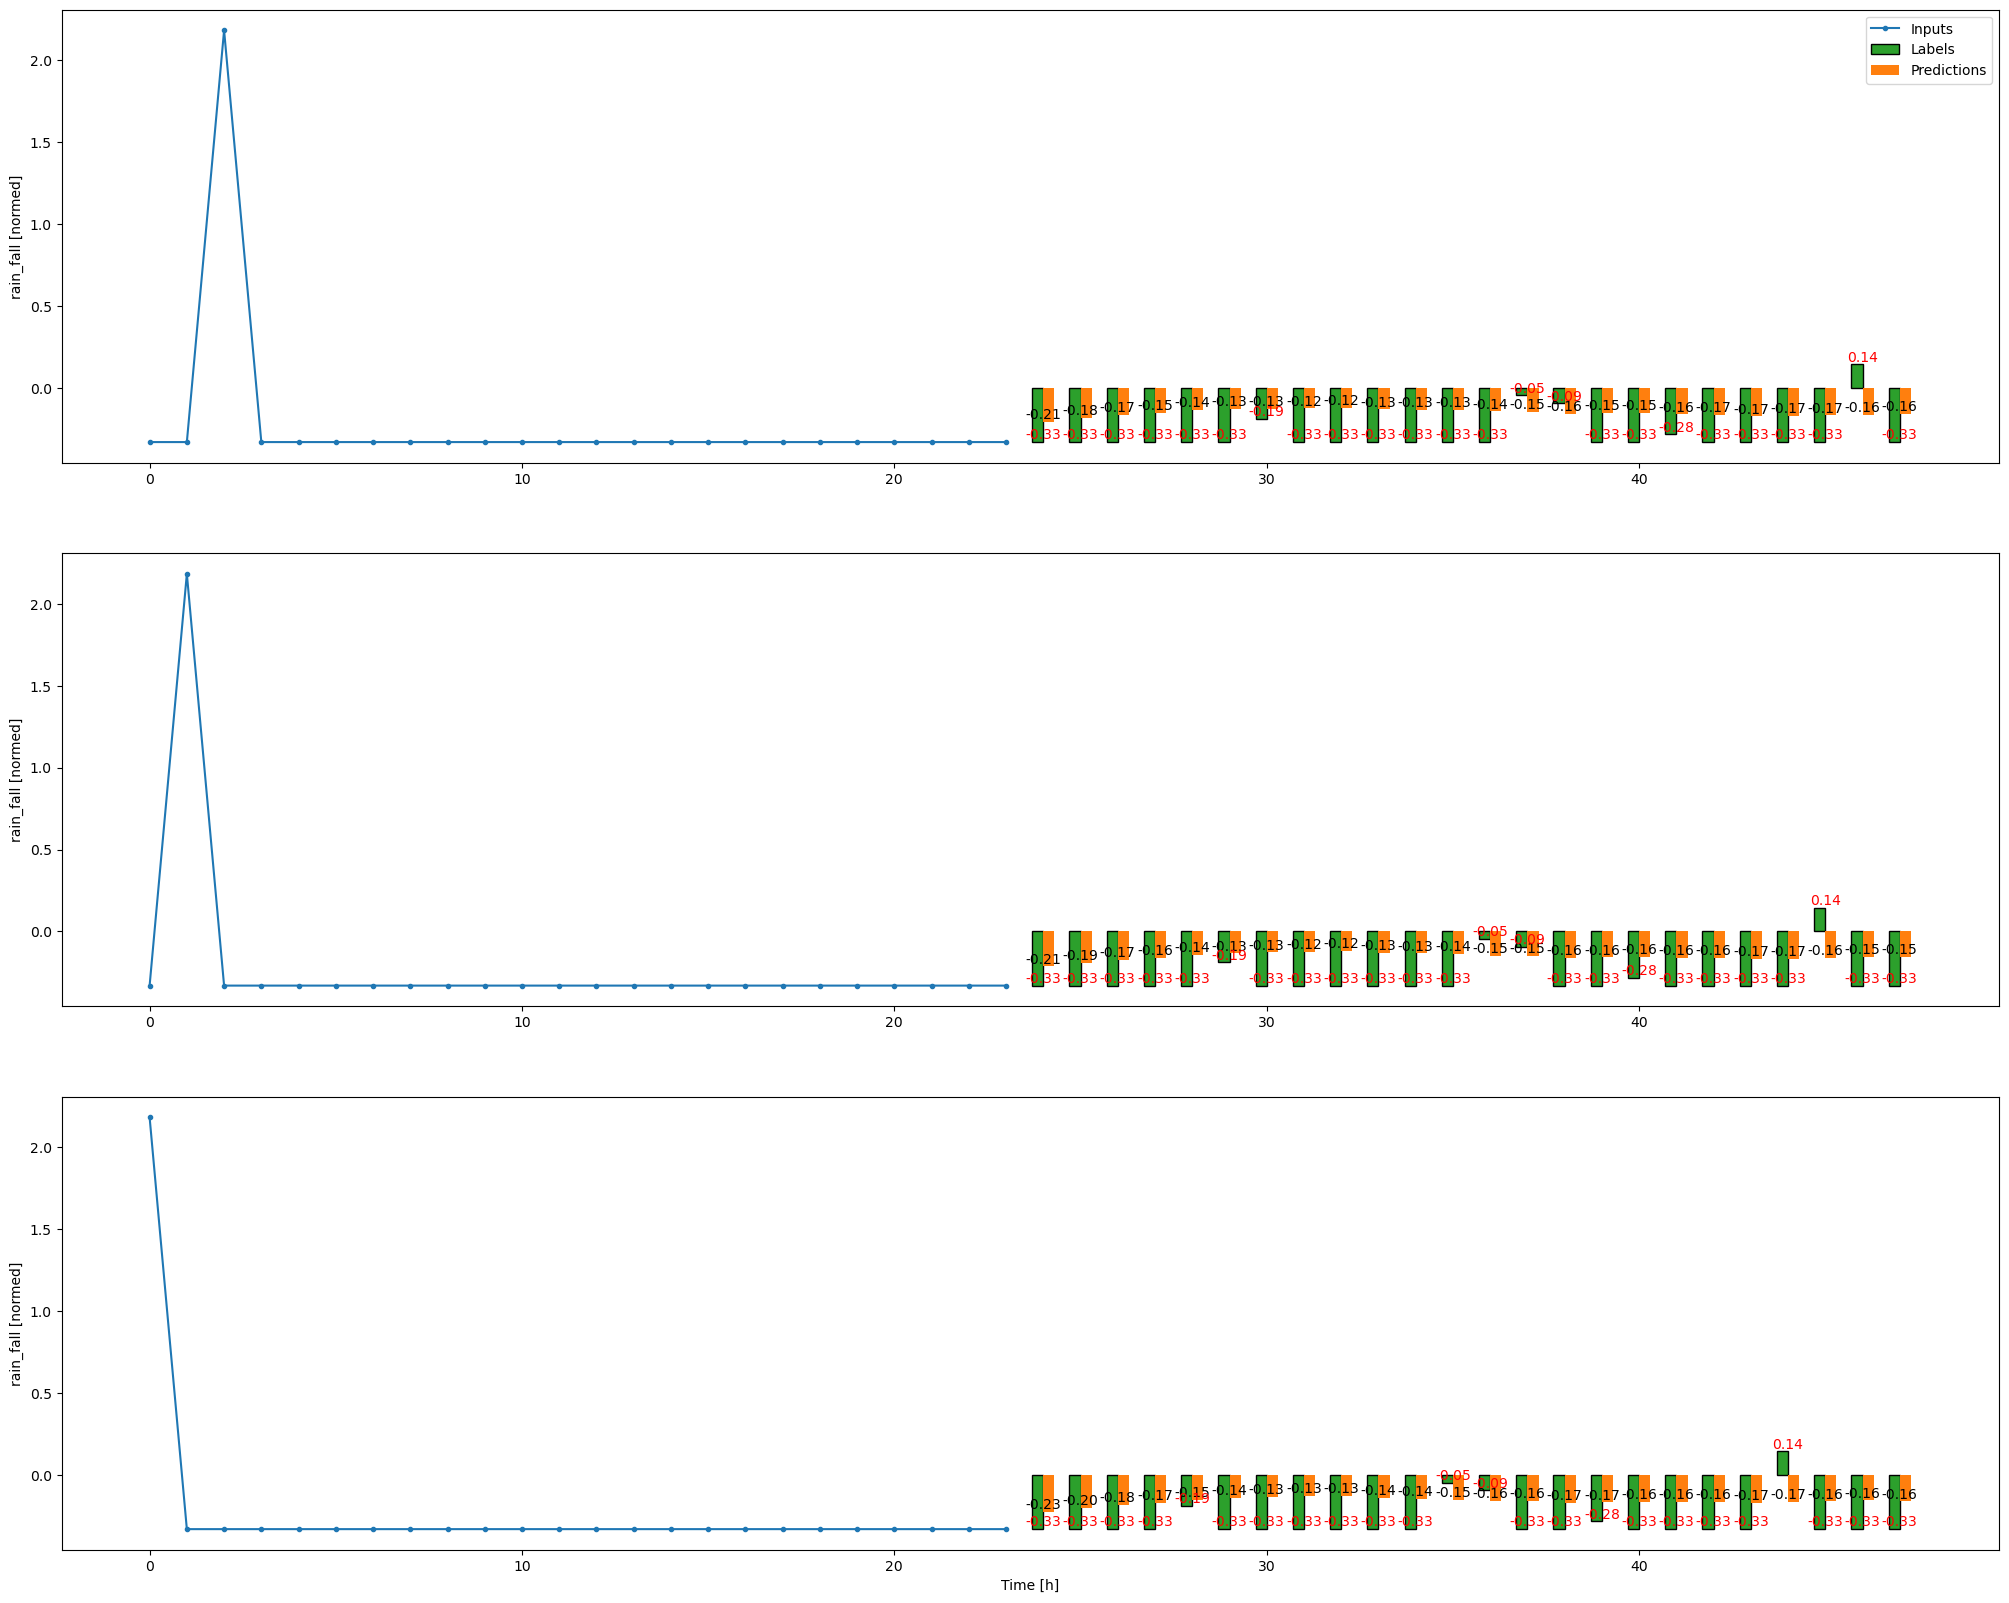

In [47]:
gru_model = tf.keras.models.Sequential([
    # Lớp GRU với 50 đơn vị
    tf.keras.layers.GRU(50, return_sequences=False),
    # Lớp Dense để chuyển đổi đầu ra thành OUT_STEPS * num_features
    tf.keras.layers.Dense(OUT_STEPS * num_features, kernel_initializer=tf.initializers.zeros()),
    # Lớp Reshape để định hình đầu ra thành [batch, OUT_STEPS, num_features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = show_results('GRU',gru_model,multi_window,multi_val_performance,multi_performance)

multi_window.plot(gru_model)

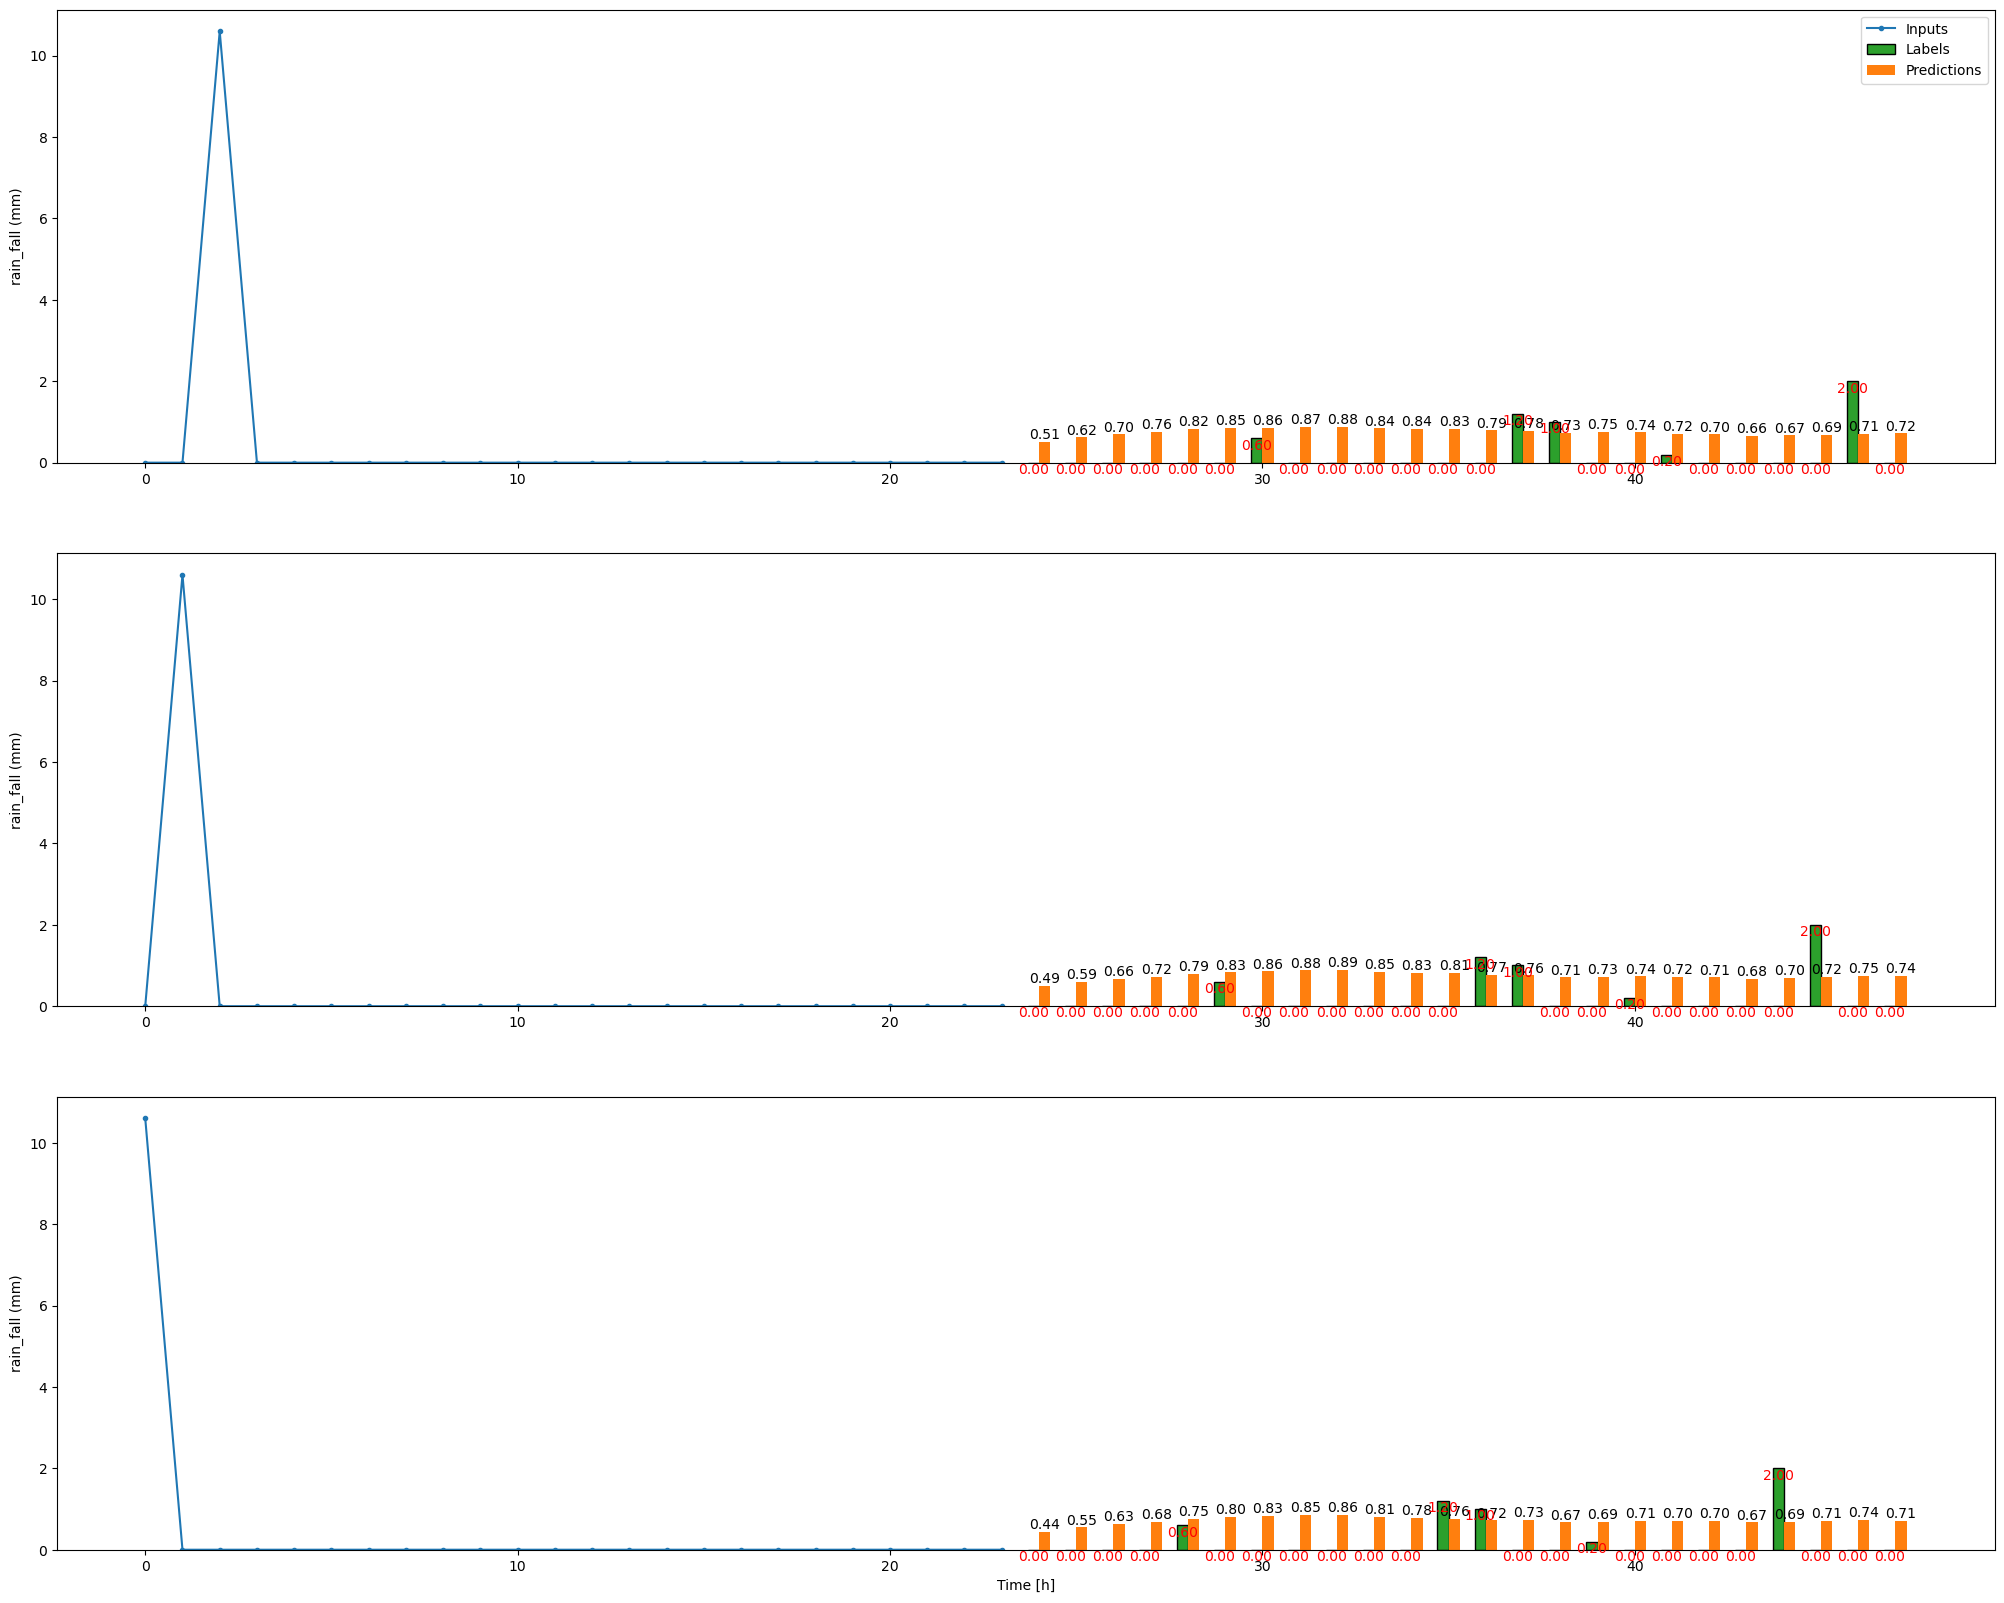

In [48]:
multi_window.plot_original(gru_model)

RNN model

Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
102/102 [==============================] - 0s 3ms/step - loss: 1.2610 - mean_absolute_error: 0.6792 - mean_squared_error: 1.2610
Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
>> Runtime: 8.86 seconds (0.15 minutes)


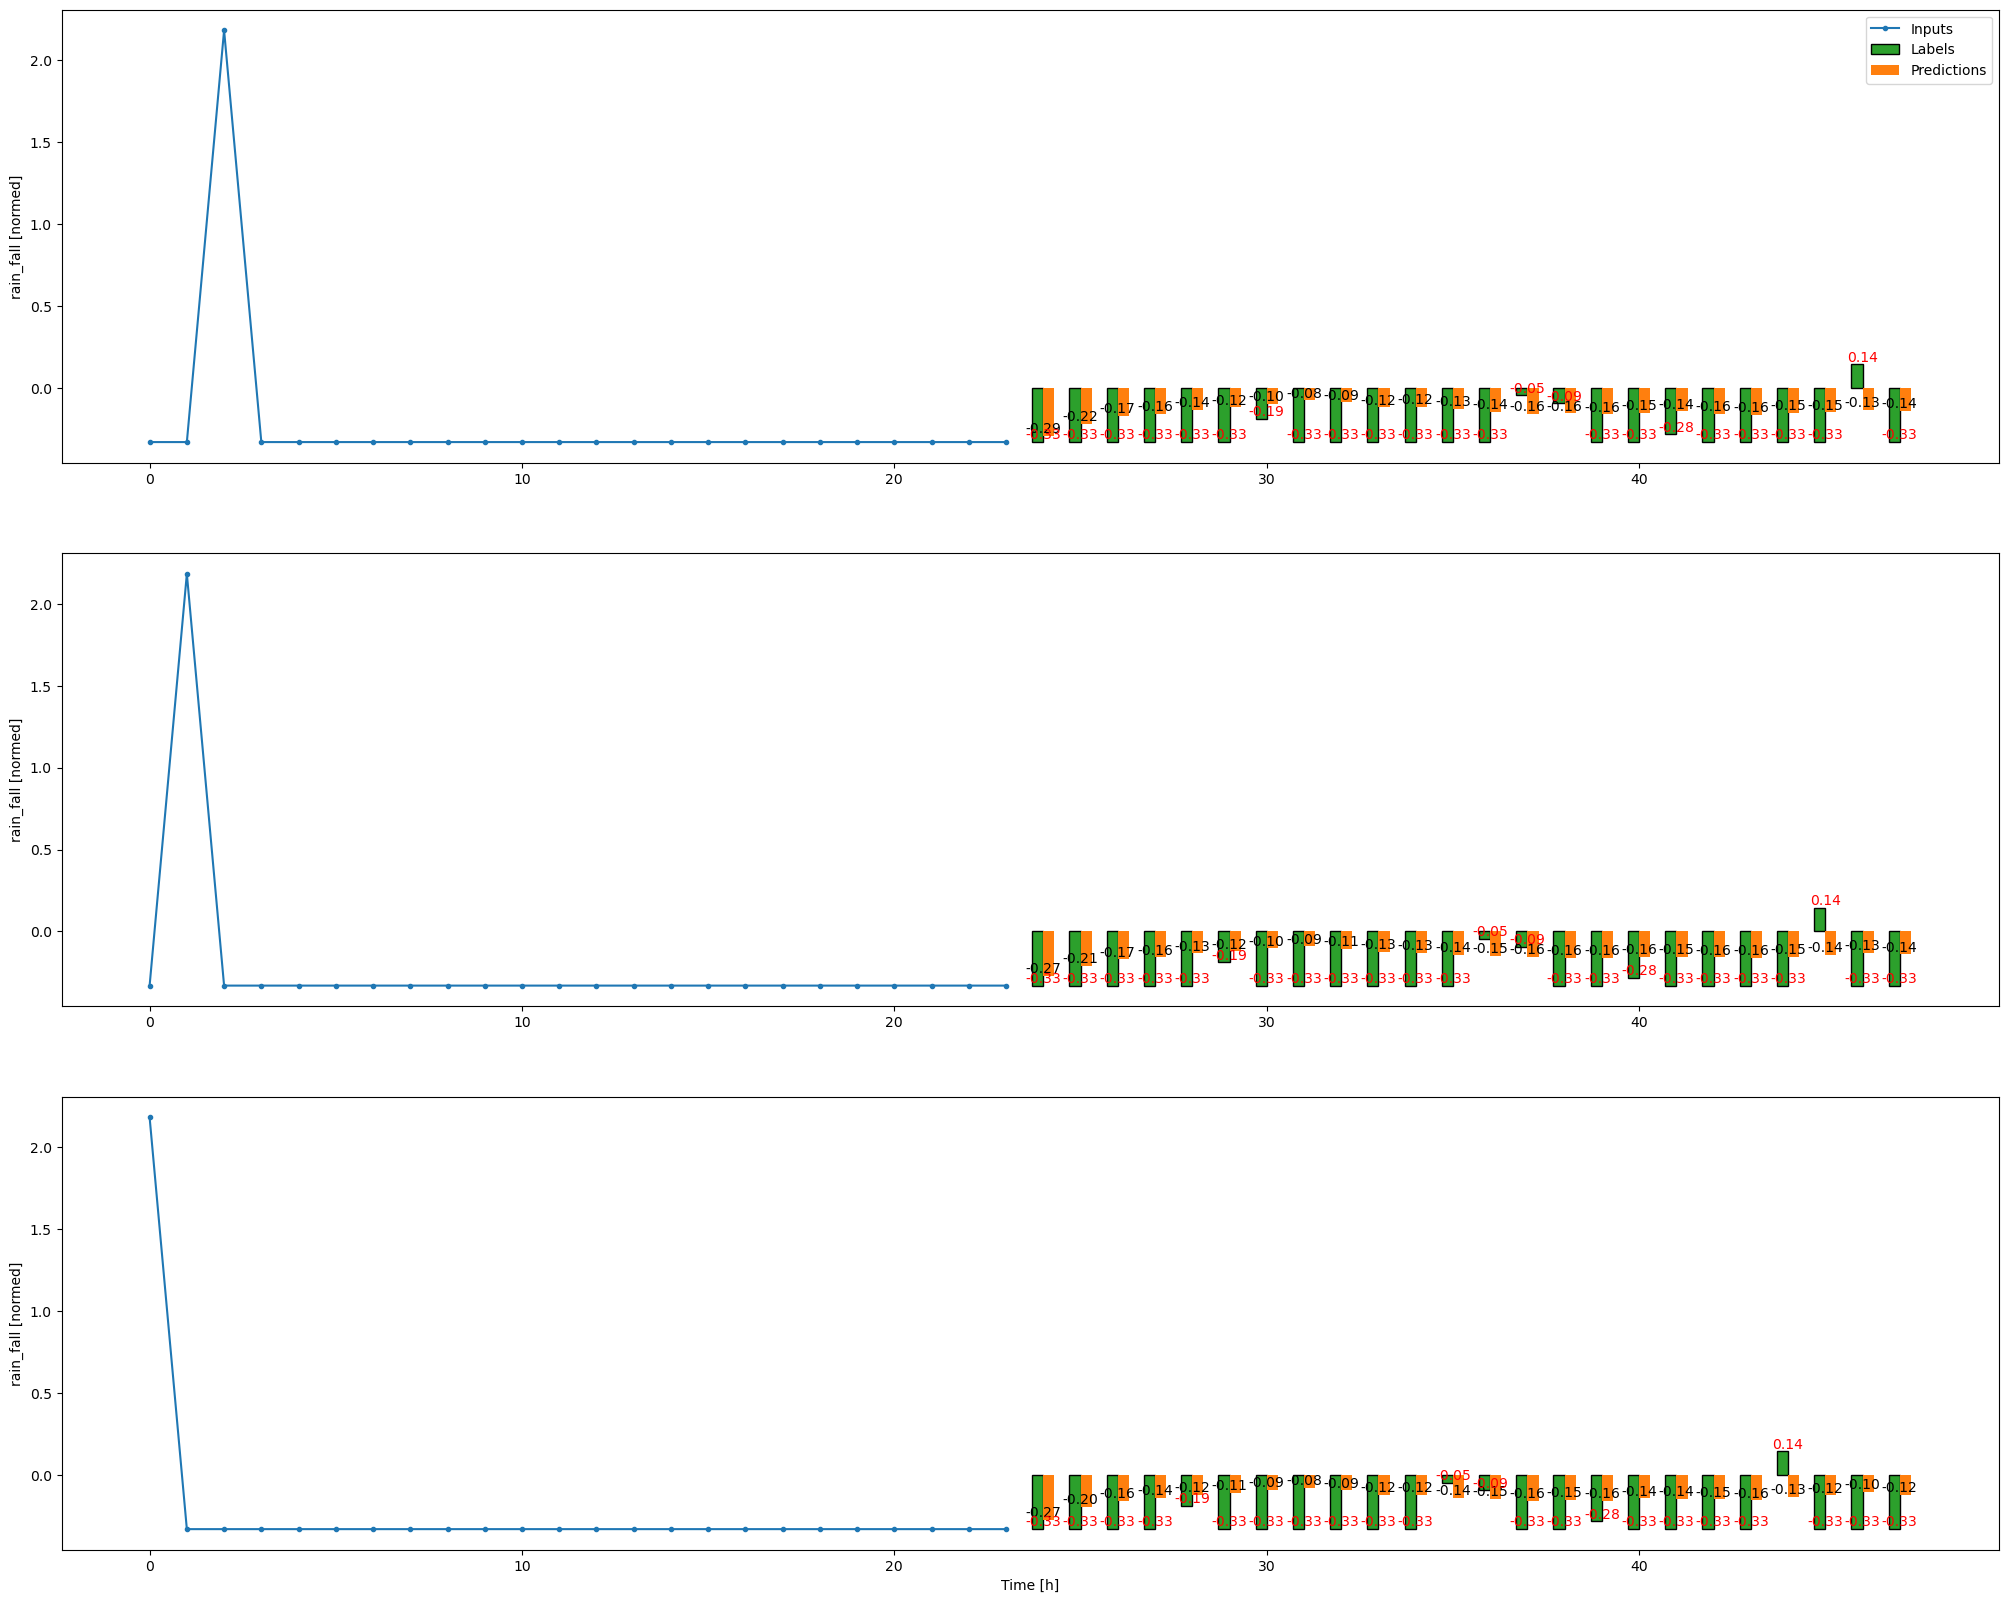

In [49]:
rnn_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, rnn_units]
    tf.keras.layers.SimpleRNN(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

# Train and evaluate the model
history = show_results('RNN', rnn_model, multi_window, multi_val_performance, multi_performance)

# Plot the results
multi_window.plot(rnn_model)

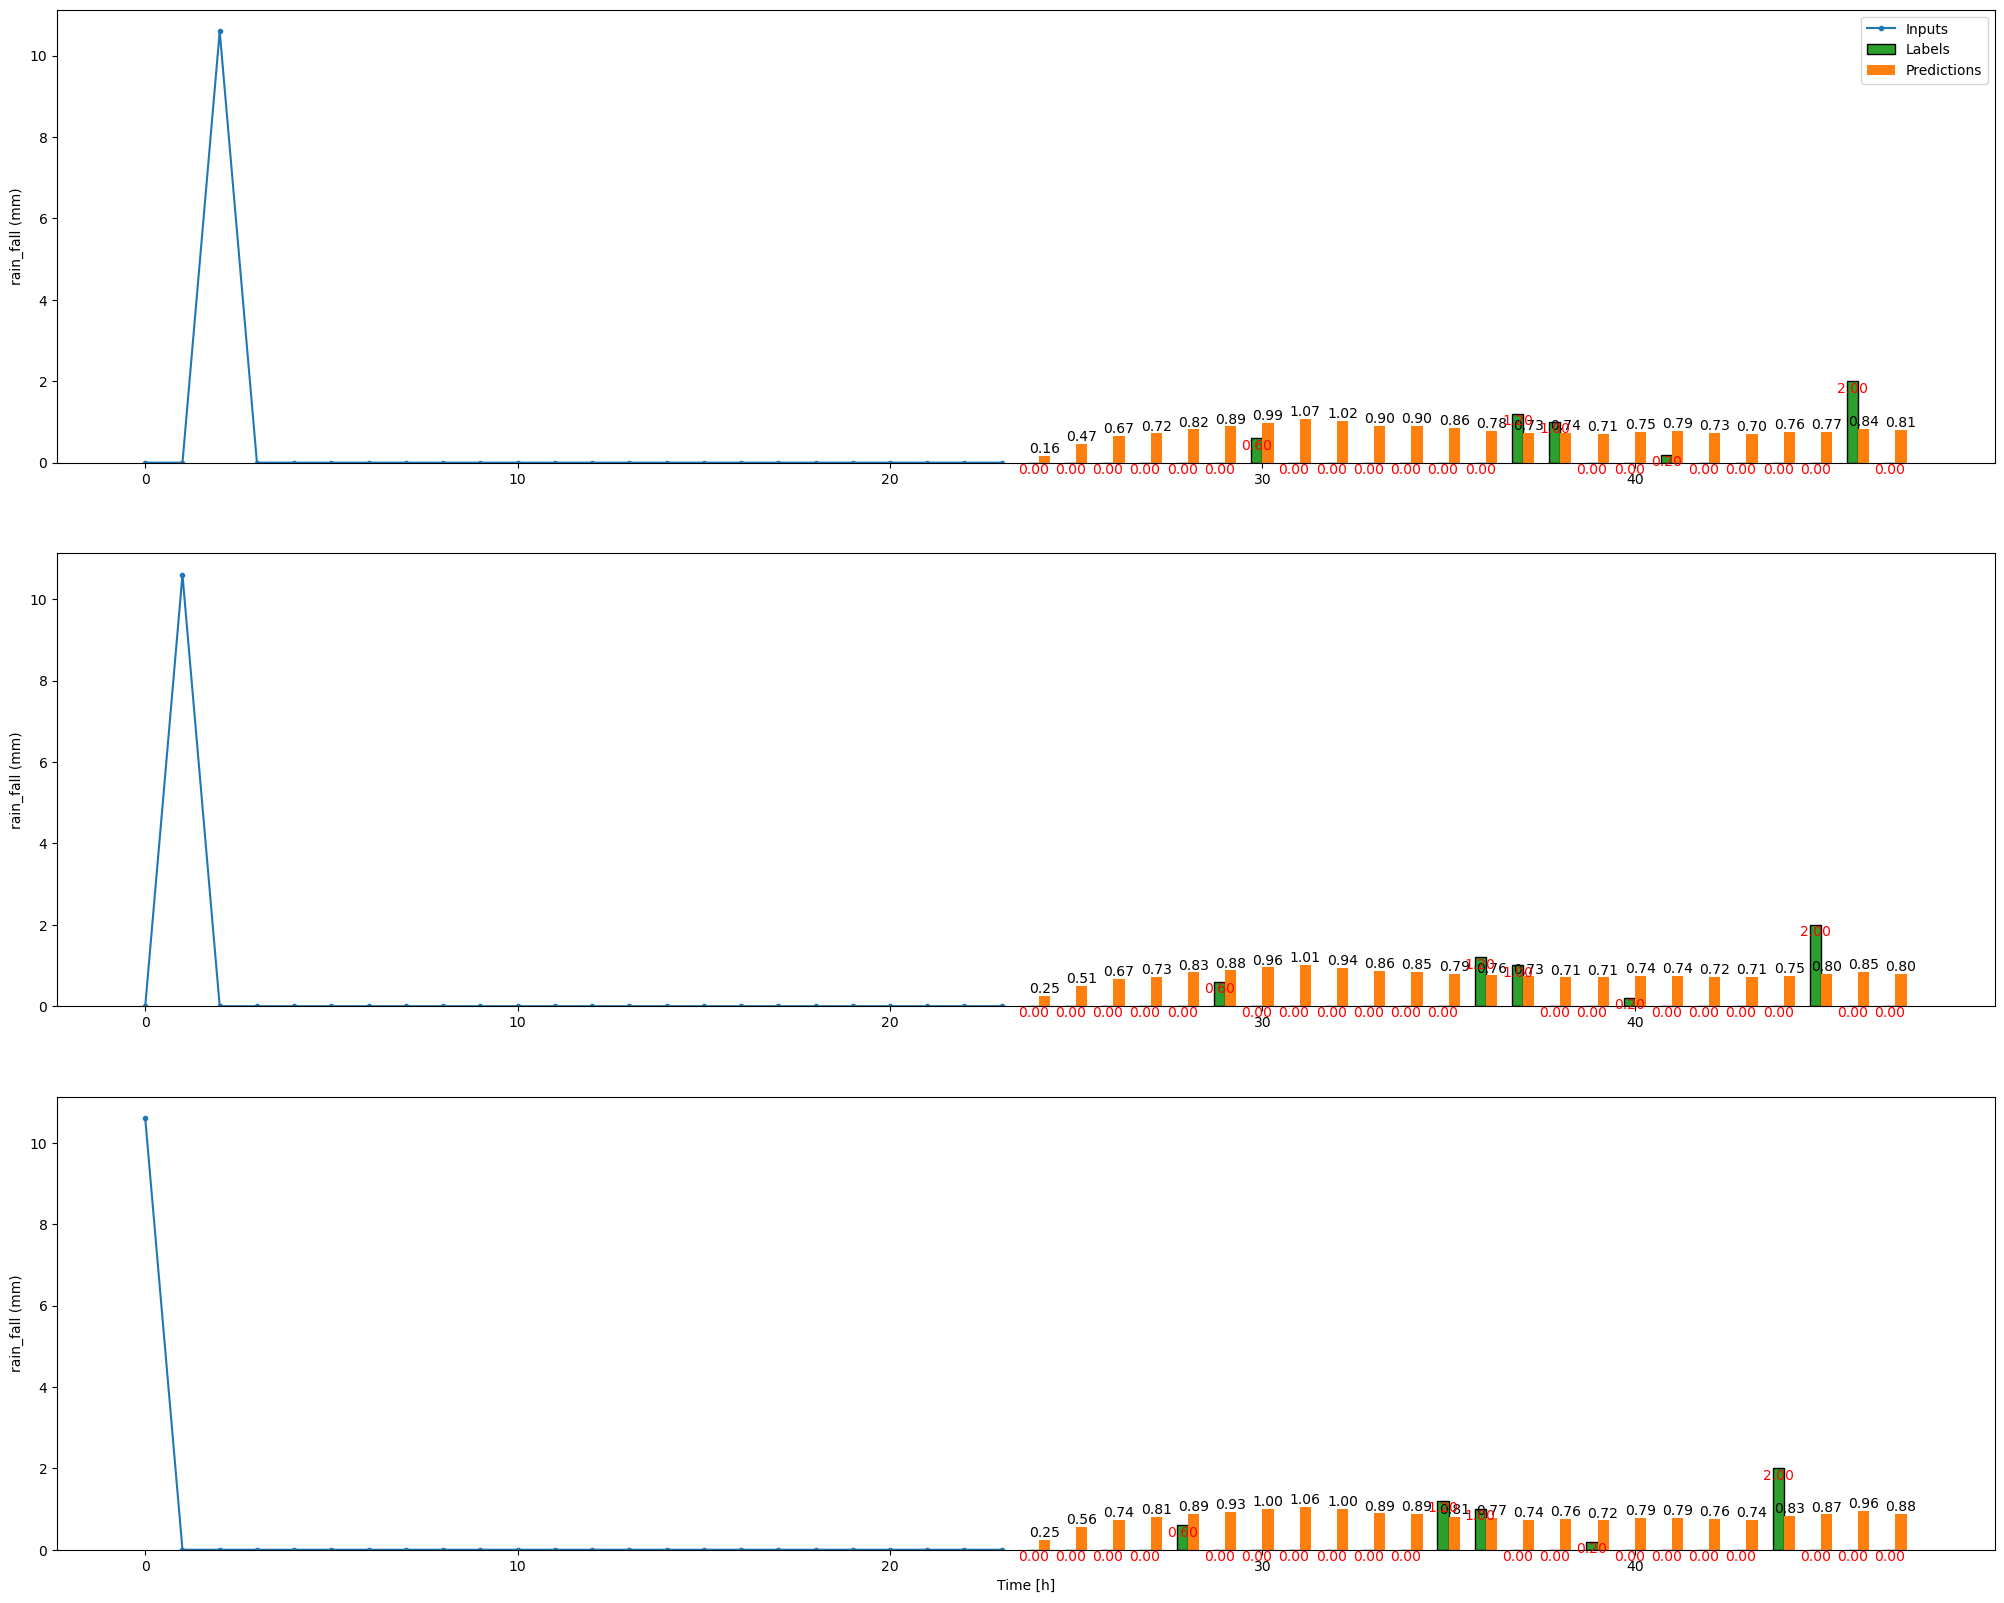

In [50]:
multi_window.plot_original(rnn_model)

In [51]:
# In ra MAE và MSE
for name, value in multi_performance.items():
  mae = value[1]  # MAE là metric thứ hai
  mse = value[2]  # MSE là metric thứ ba
  print(f'{name:8s} - MAE: {mae:.4f}, MSE: {mse:.4f}')

Linear   - MAE: 0.3454, MSE: 0.4072
LSTM     - MAE: 0.3725, MSE: 0.4005
GRU      - MAE: 0.3869, MSE: 0.3940
RNN      - MAE: 0.4451, MSE: 0.4256


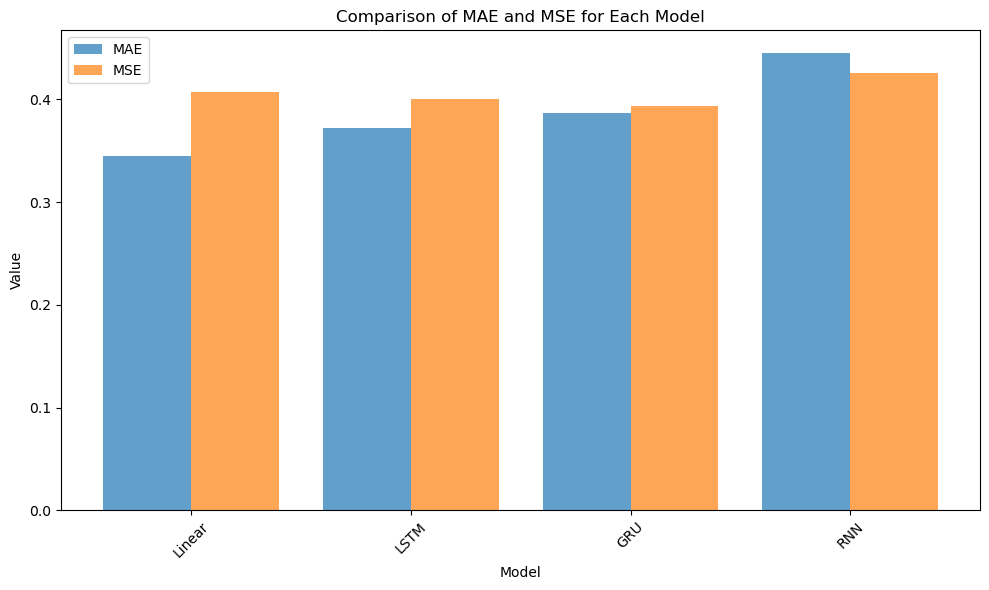

In [52]:
# Prepare data
model_names = [name for name, _ in multi_performance.items()]
mae_values = [value[1] for _, value in multi_performance.items()]
mse_values = [value[2] for _, value in multi_performance.items()]

# Set up the figure size and subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions and width for the bars
positions = range(len(model_names))
bar_width = 0.4

# Plotting MAE and MSE values
plt.bar([p - bar_width/2 for p in positions], mae_values, width=bar_width, label='MAE', alpha=0.7)
plt.bar([p + bar_width/2 for p in positions], mse_values, width=bar_width, label='MSE', alpha=0.7)

# Adding some labels and title
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Comparison of MAE and MSE for Each Model')
plt.xticks(positions, model_names, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
import pickle

In [54]:
pickle.dump(linear_model, open('LinearRegression.pkl','wb'))
pickle.dump(lstm_model, open('LSTM.pkl','wb'))
pickle.dump(gru_model, open('GRU.pkl','wb'))
pickle.dump(rnn_model, open('RNN.pkl','wb'))

Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
102/102 [==============================] - 0s 2ms/step - loss: 1.2525 - mean_absolute_error: 0.6475 - mean_squared_error: 1.2525
Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
>> Runtime: 3.87 seconds (0.06 minutes)


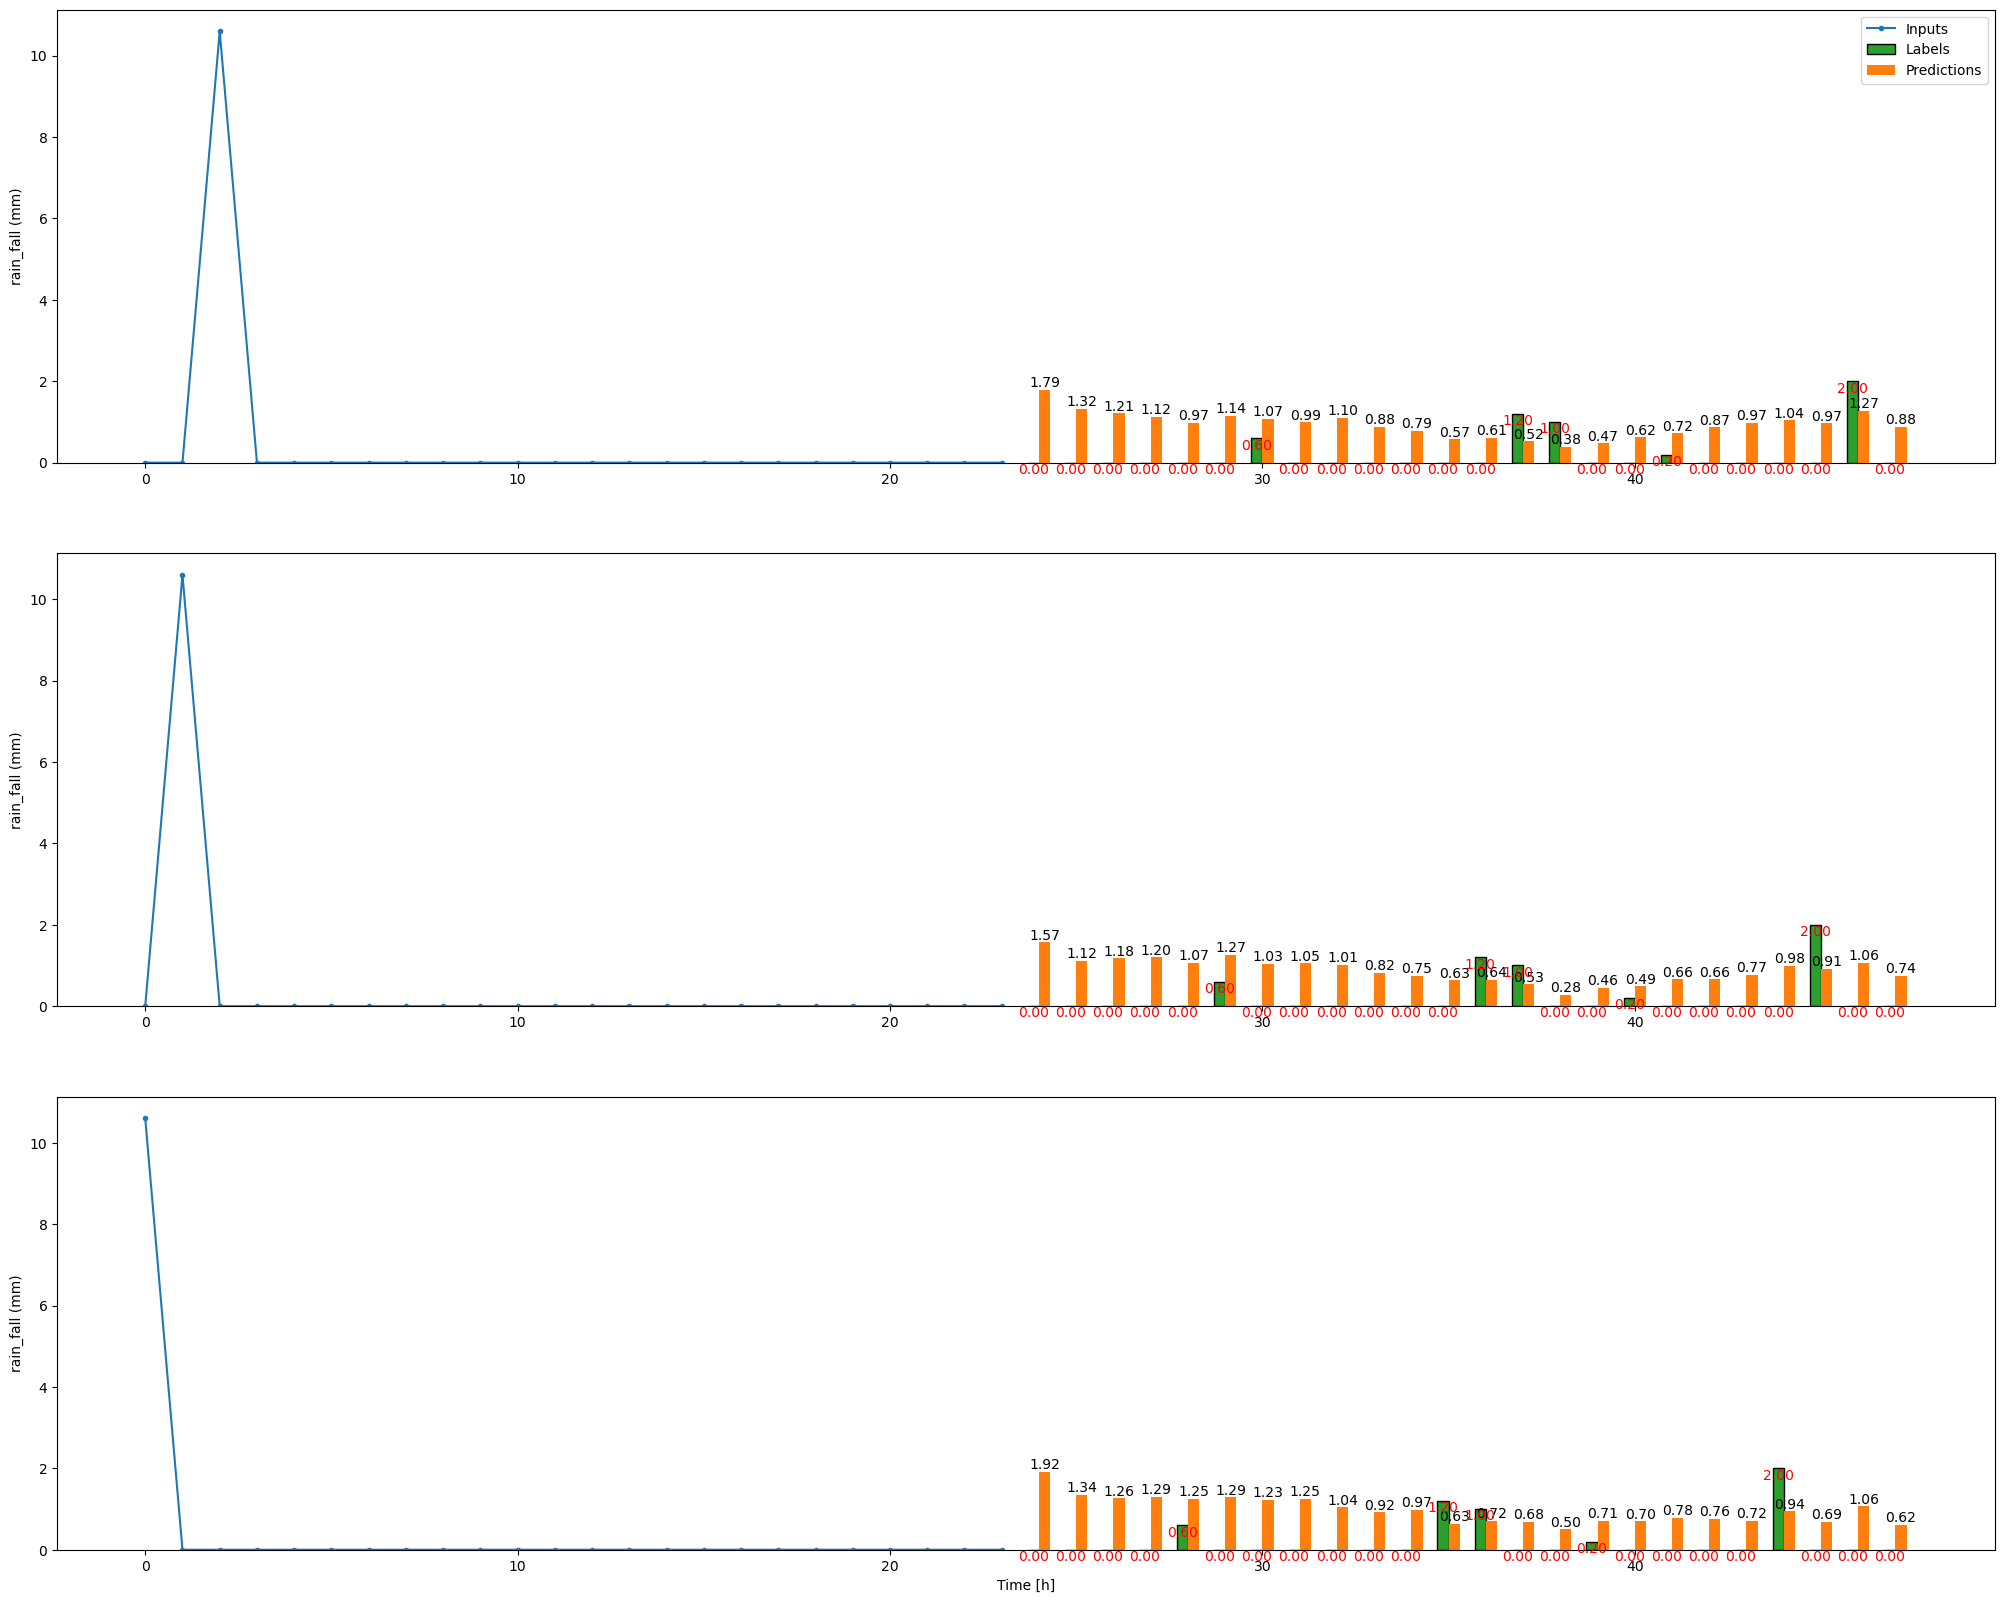

In [62]:
linear_2_layers_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, time * features]
    tf.keras.layers.Flatten(),
    # New Dense layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS * num_features, kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = show_results('Linear 2 layers', linear_2_layers_model, multi_window, multi_val_performance, multi_performance)

multi_window.plot_original(linear_2_layers_model)

Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
102/102 [==============================] - 0s 3ms/step - loss: 1.2408 - mean_absolute_error: 0.5969 - mean_squared_error: 1.2408
Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
>> Runtime: 17.21 seconds (0.29 minutes)


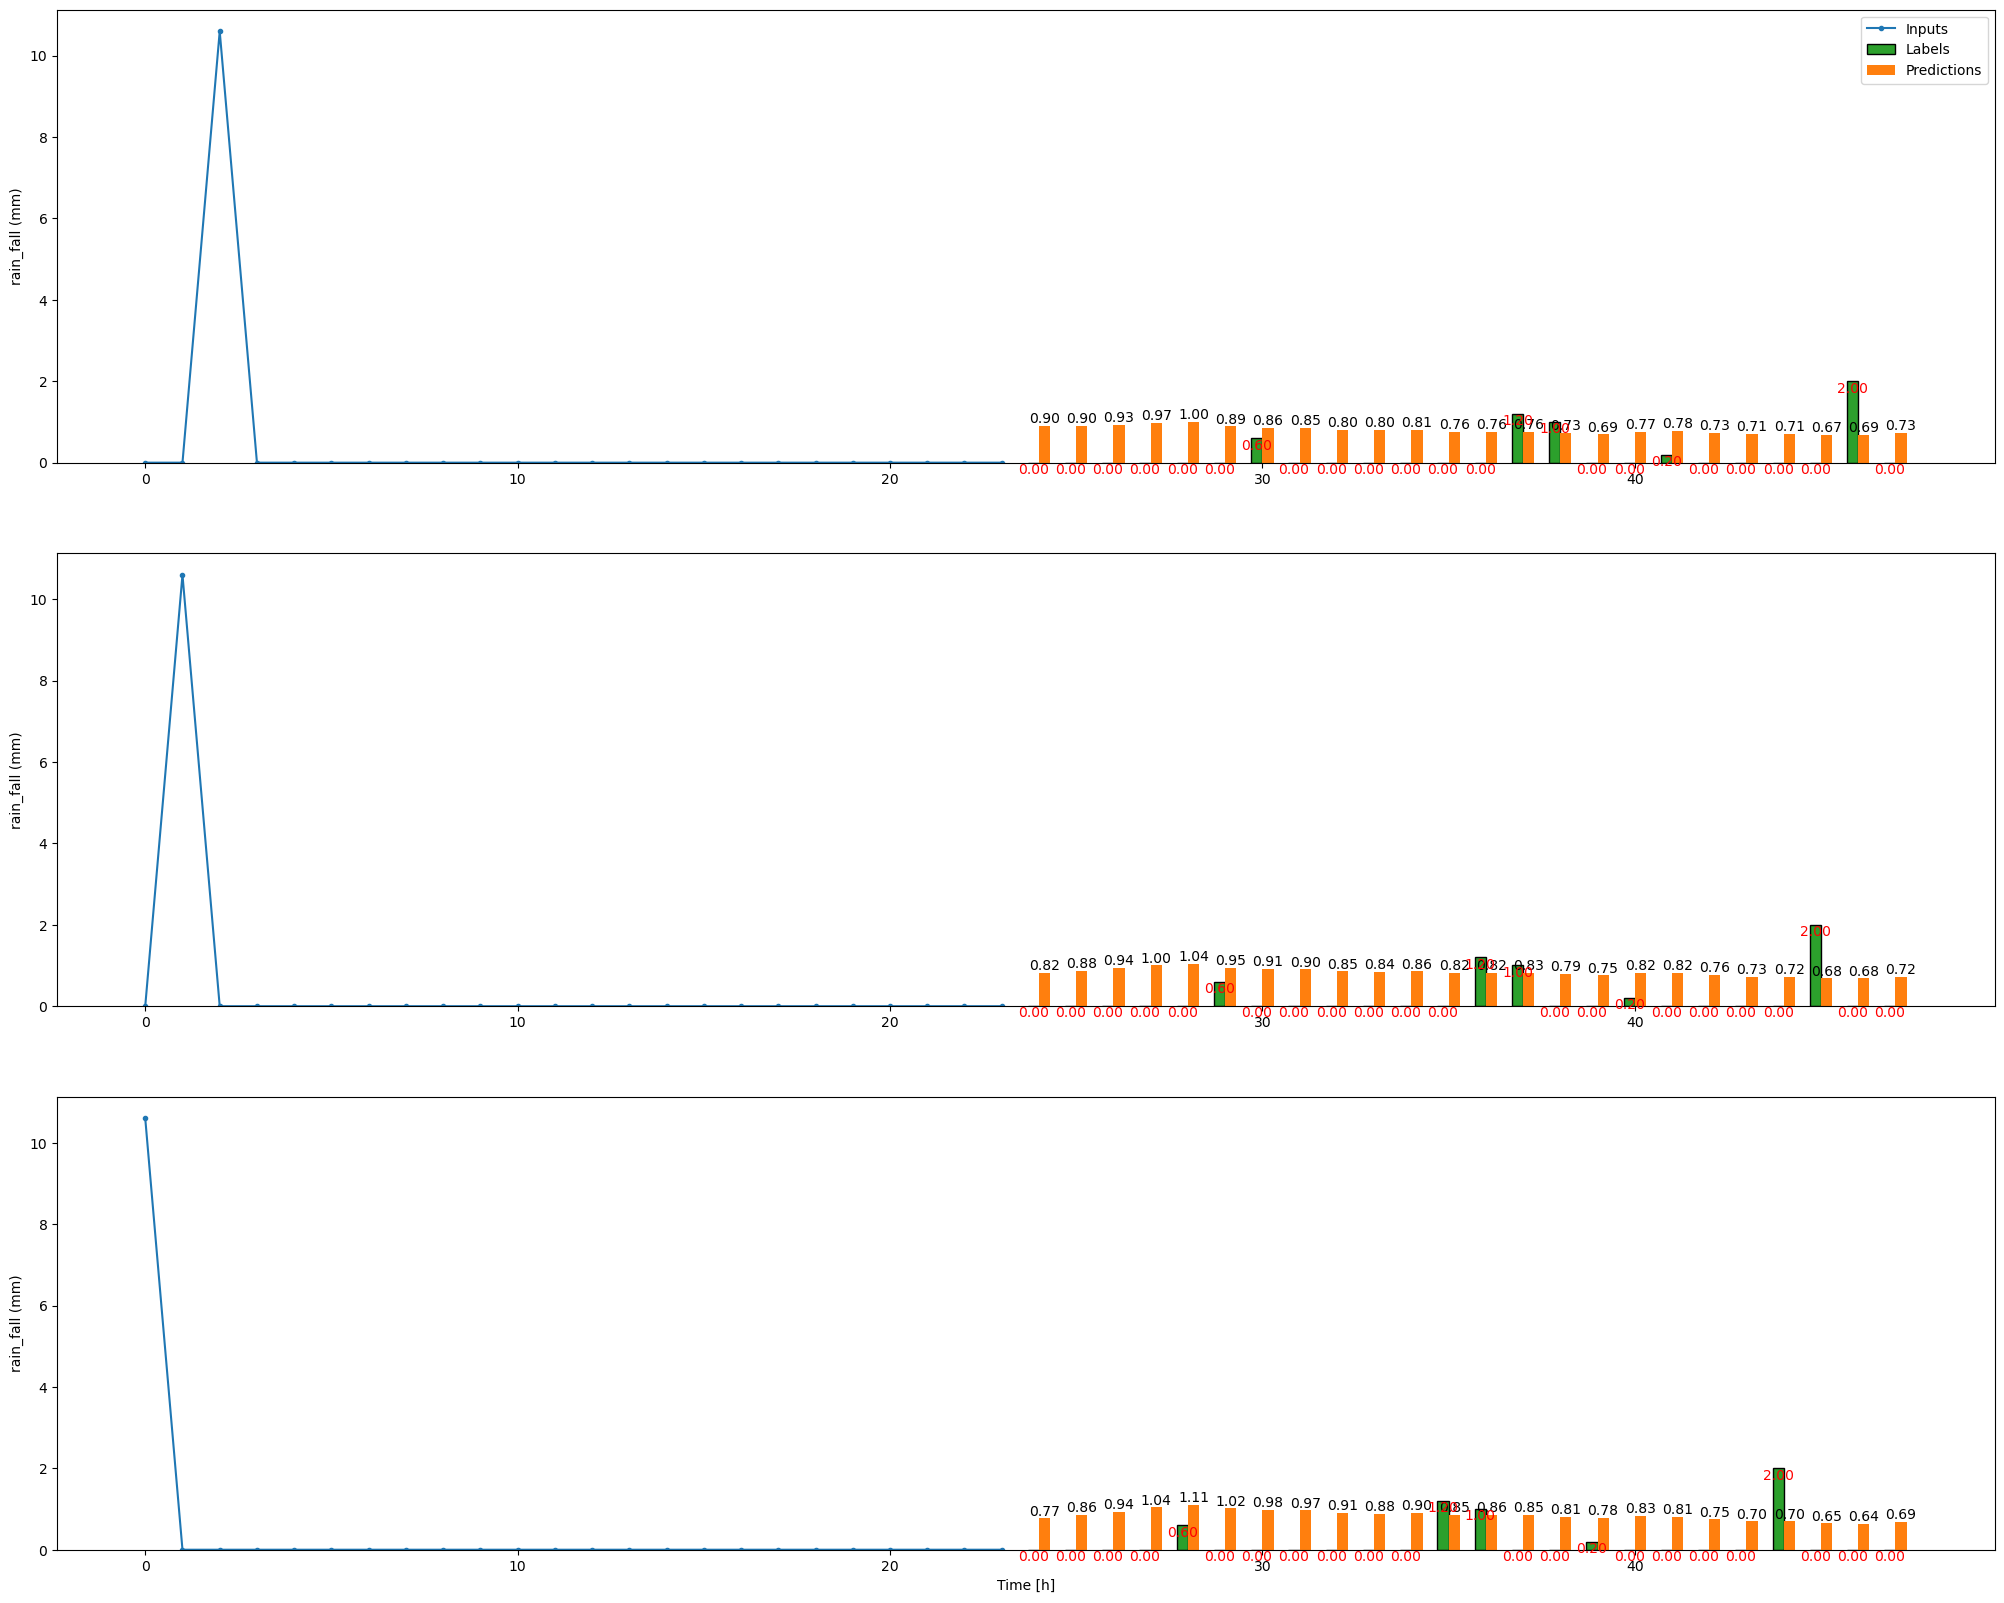

In [63]:
bi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS * num_features, kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = show_results('Bi-LSTM', bi_lstm_model, multi_window, multi_val_performance, multi_performance)

multi_window.plot_original(bi_lstm_model)

Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
102/102 [==============================] - 0s 3ms/step - loss: 1.2369 - mean_absolute_error: 0.6129 - mean_squared_error: 1.2369
Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
>> Runtime: 19.90 seconds (0.33 minutes)


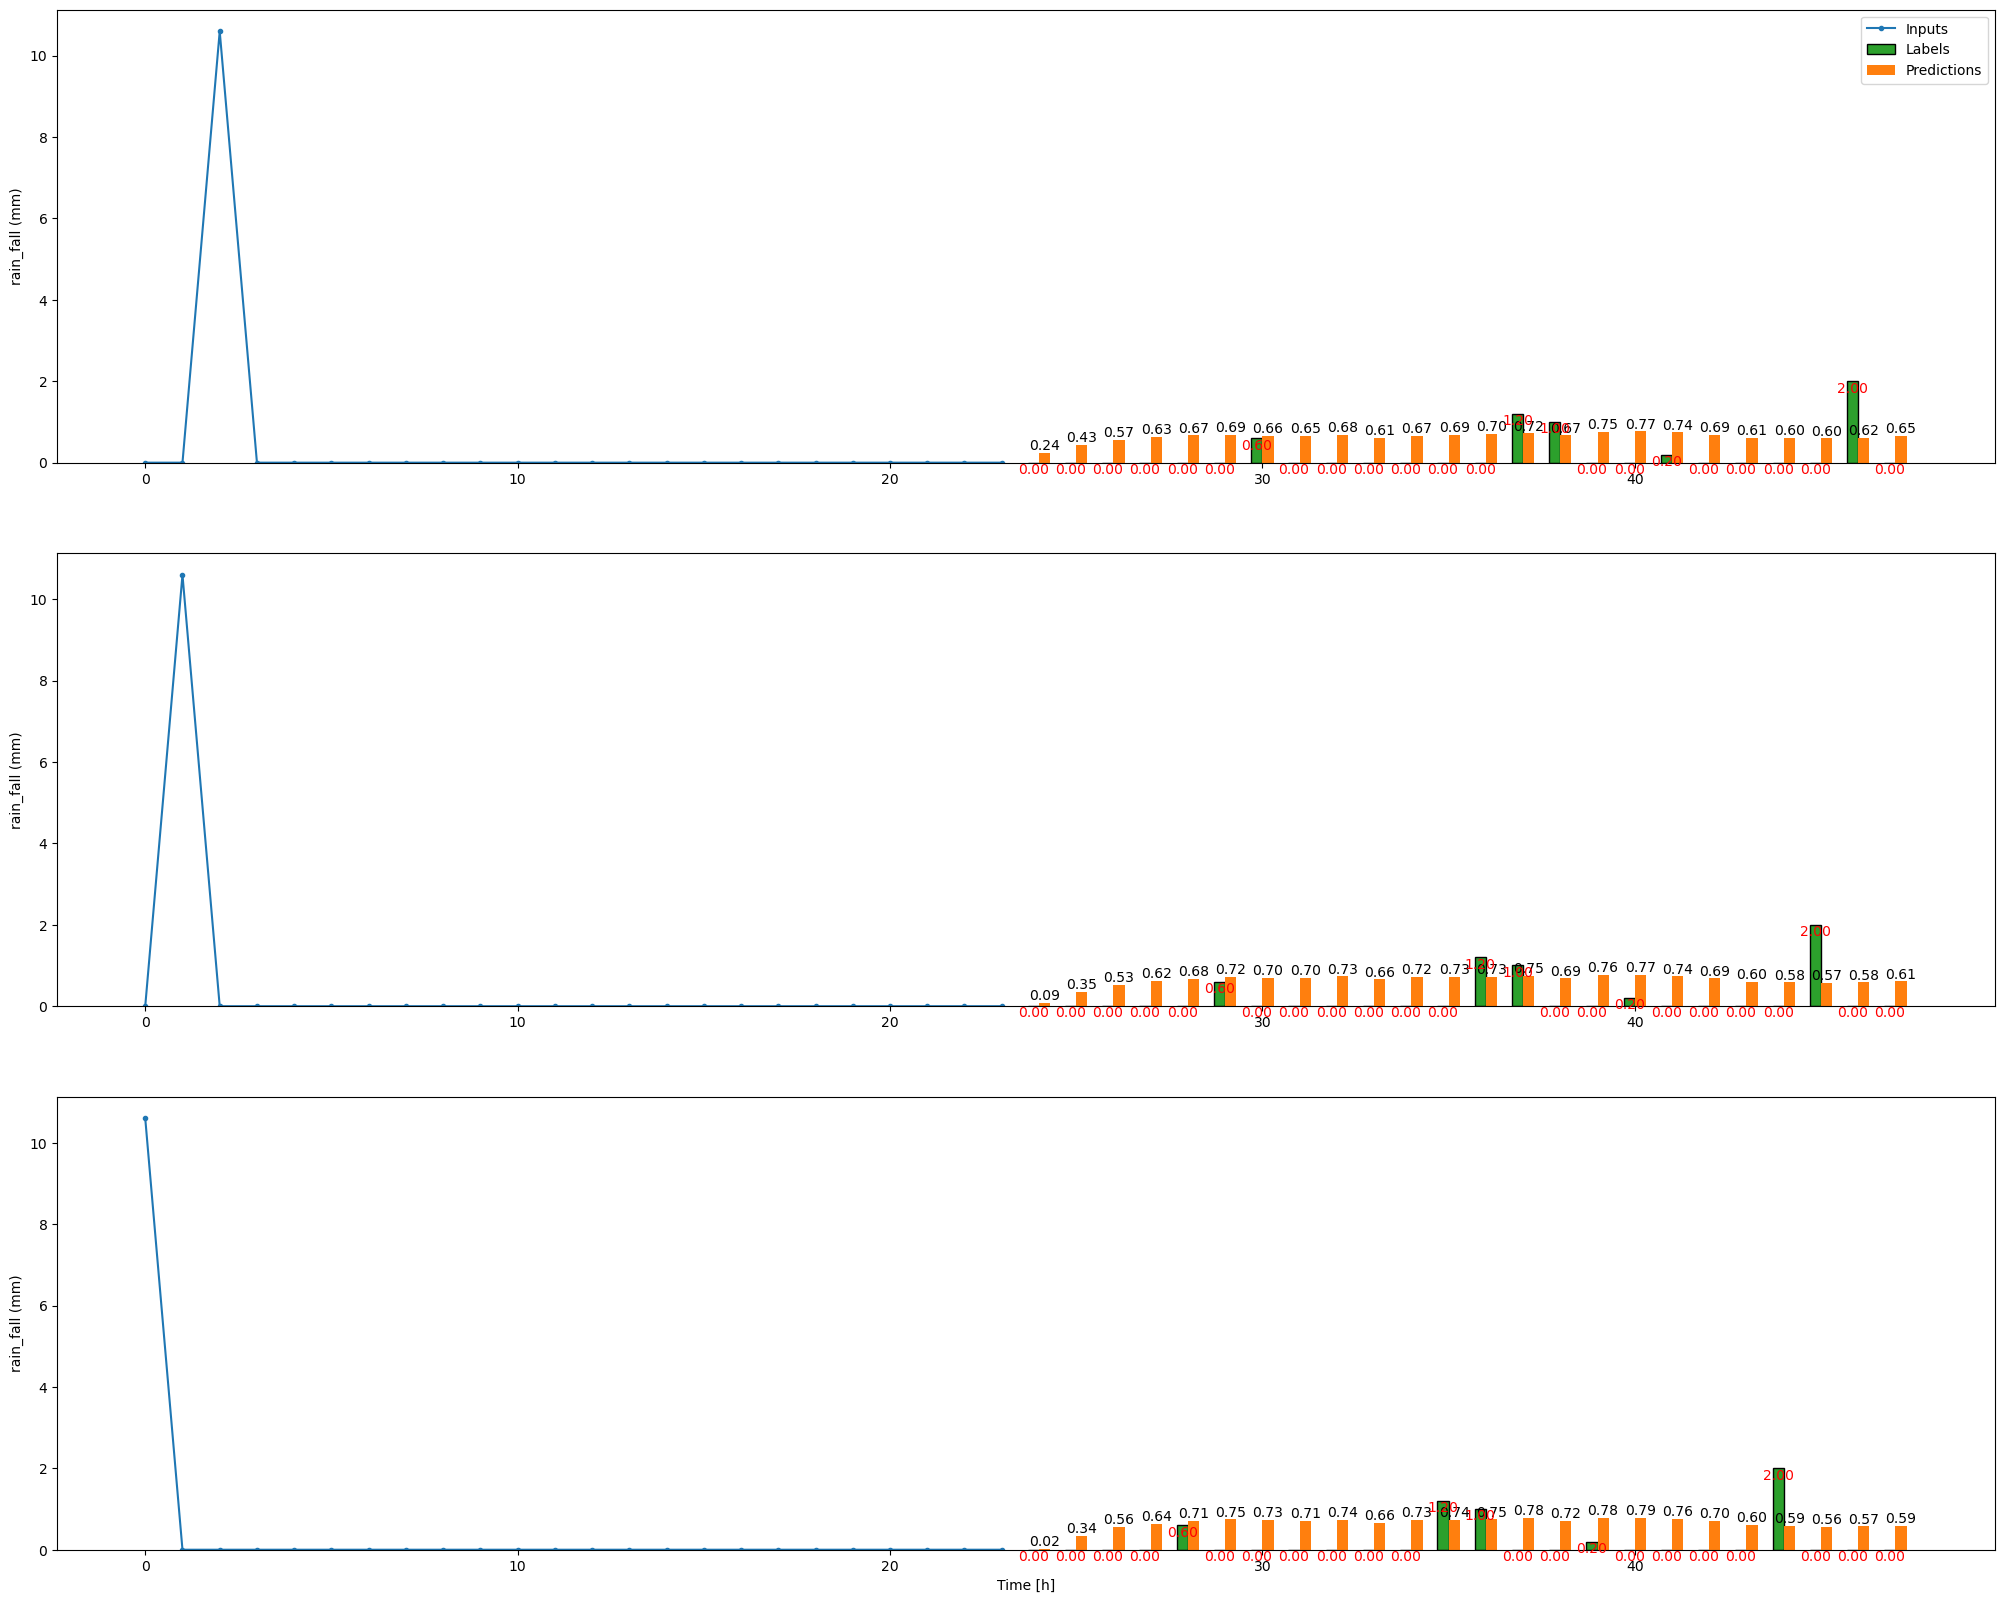

In [64]:
gru_2_layers_model = tf.keras.models.Sequential([
    # Lớp GRU với 50 đơn vị
    tf.keras.layers.GRU(50, return_sequences=False),
    # Thêm lớp Dense với 64 đơn vị và hàm kích hoạt ReLU
    tf.keras.layers.Dense(64, activation='relu'),
    # Lớp Dense để chuyển đổi đầu ra thành OUT_STEPS * num_features
    tf.keras.layers.Dense(OUT_STEPS * num_features, kernel_initializer=tf.initializers.zeros()),
    # Lớp Reshape để định hình đầu ra thành [batch, OUT_STEPS, num_features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = show_results('GRU 2 layers', gru_2_layers_model, multi_window, multi_val_performance, multi_performance)

multi_window.plot_original(gru_2_layers_model)

Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
102/102 [==============================] - 0s 2ms/step - loss: 1.2508 - mean_absolute_error: 0.6630 - mean_squared_error: 1.2508
Inputs shape: (None, 24, 9)
Labels shape: (None, 24, 1)
>> Runtime: 9.90 seconds (0.17 minutes)


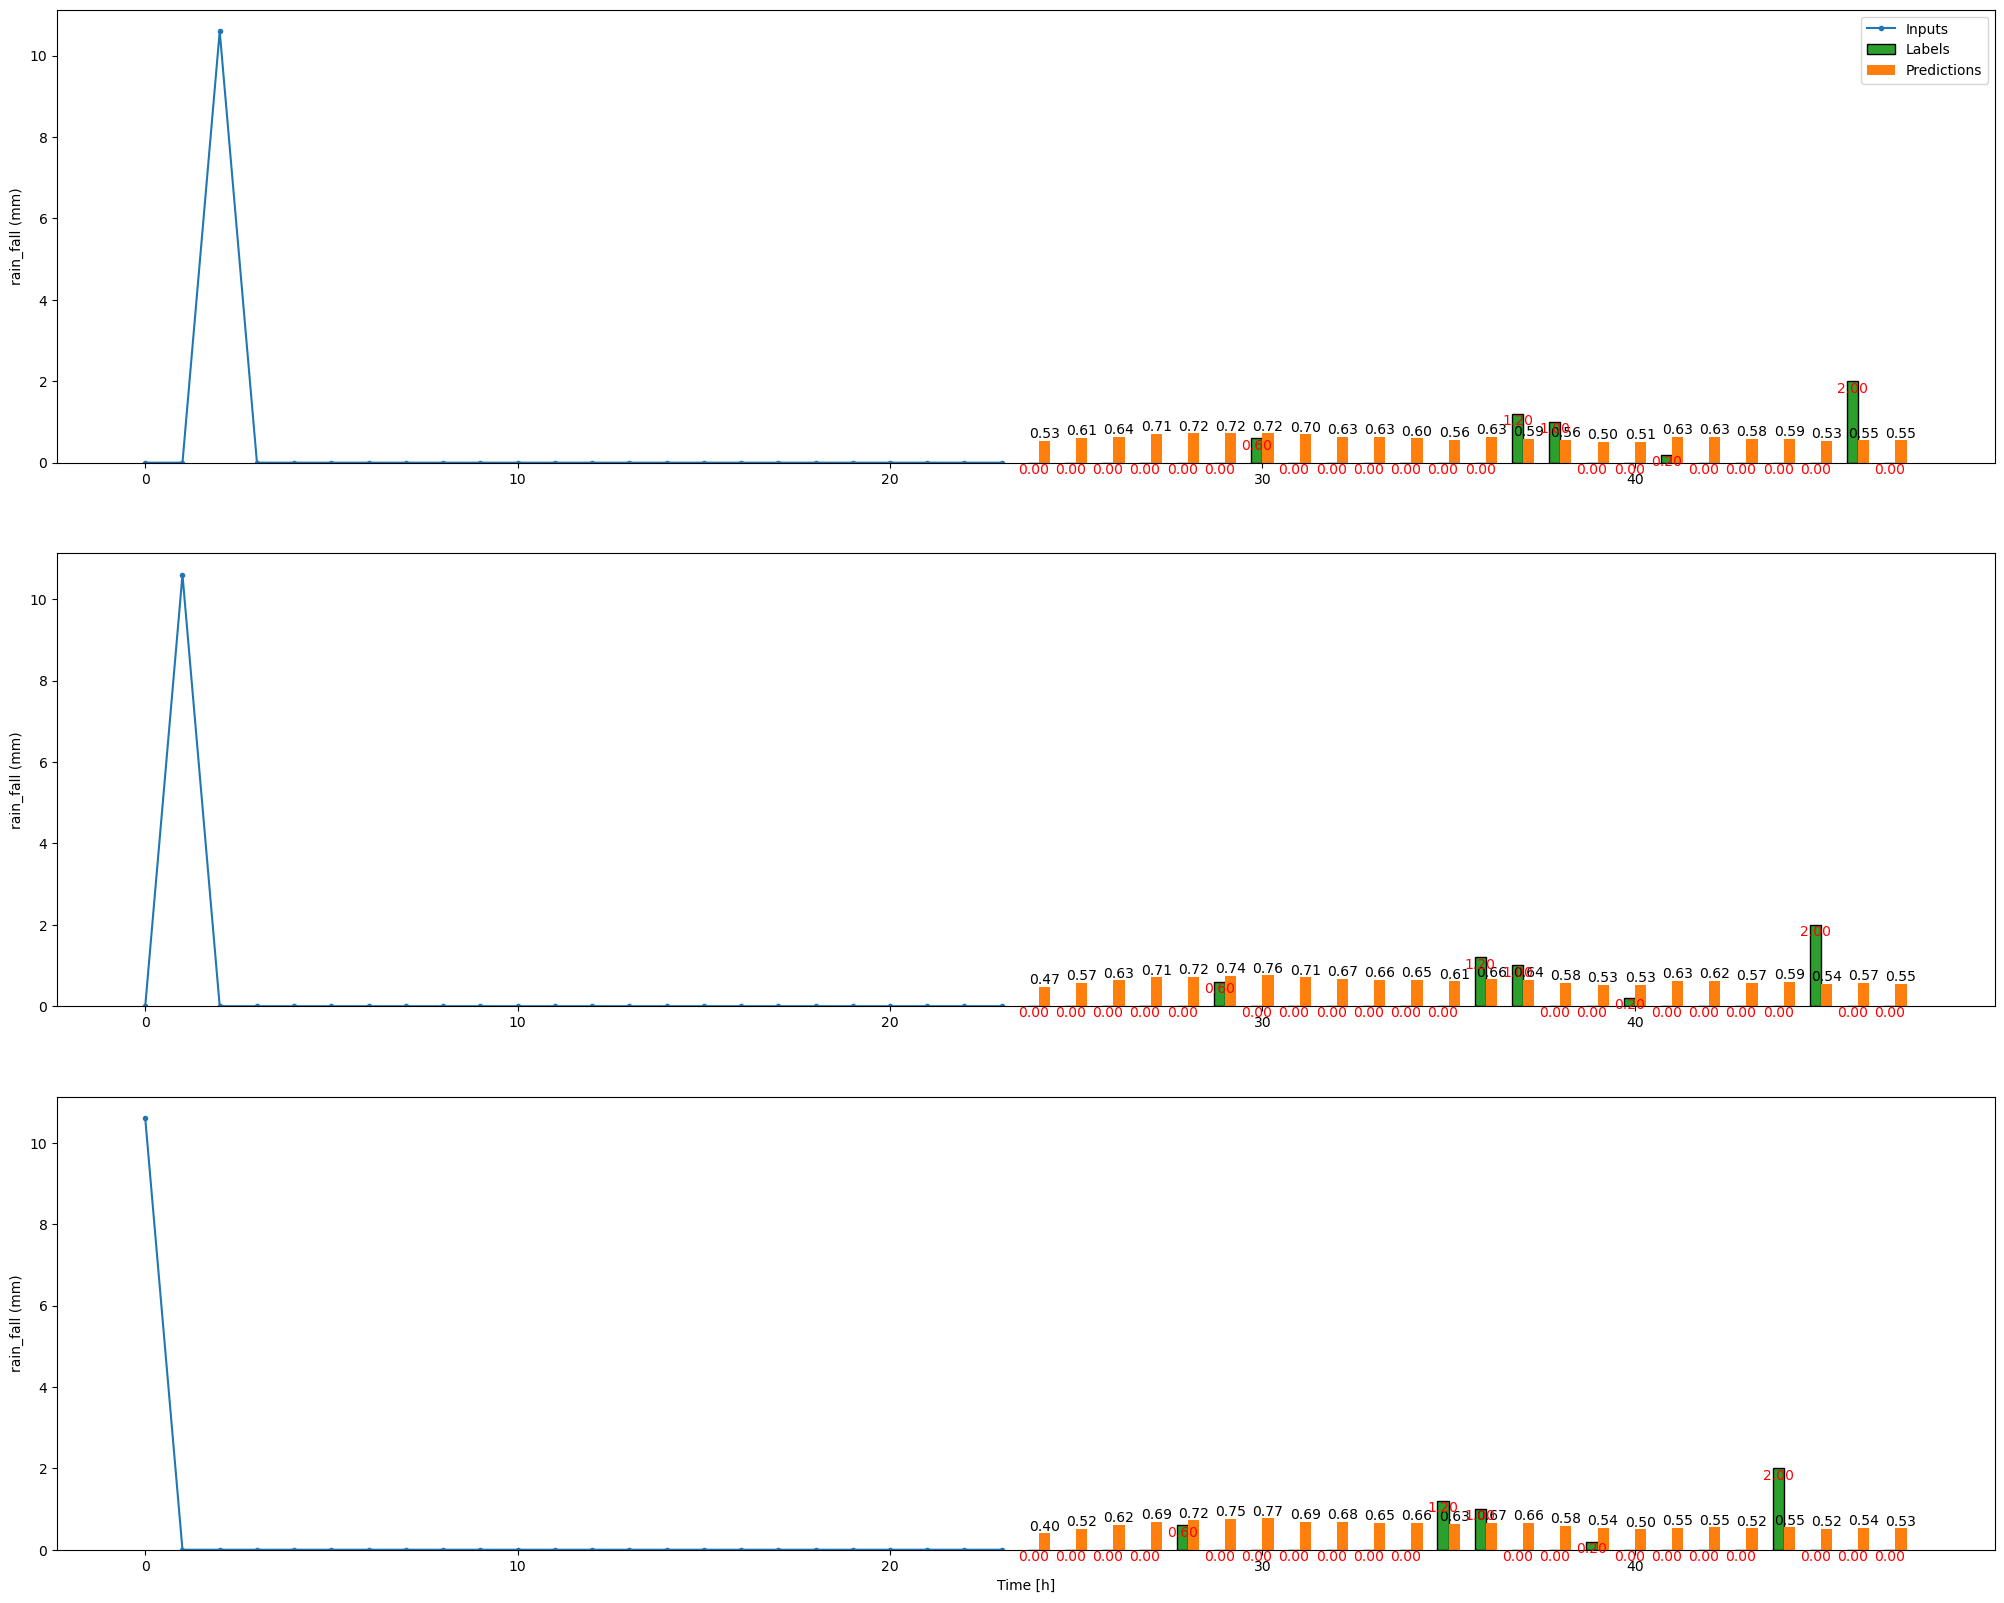

In [65]:
rnn_2_layers_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, rnn_units]
    tf.keras.layers.SimpleRNN(32, return_sequences=False),
    # Thêm lớp Dense với 64 đơn vị và hàm kích hoạt ReLU
    tf.keras.layers.Dense(64, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS * num_features, kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

# Train and evaluate the model
history = show_results('RNN 2 layers', rnn_2_layers_model, multi_window, multi_val_performance, multi_performance)

# Plot the results
multi_window.plot_original(rnn_2_layers_model)

In [66]:
for name, value in multi_performance.items():
  mae = value[1]  # MAE là metric thứ hai
  mse = value[2]  # MSE là metric thứ ba
  print(f'{name:8s} - MAE: {mae:.4f}, MSE: {mse:.4f}')

Linear   - MAE: 0.4223, MSE: 0.4125
LSTM     - MAE: 0.3725, MSE: 0.4005
GRU      - MAE: 0.3849, MSE: 0.3951
RNN      - MAE: 0.3798, MSE: 0.4065
Bi-LSTM  - MAE: 0.3587, MSE: 0.3933
Linear 2 layers - MAE: 0.4148, MSE: 0.4114
GRU 2 layers - MAE: 0.3912, MSE: 0.4010
RNN 2 layers - MAE: 0.3804, MSE: 0.4041
